# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Deepak Singh Bisht

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
#dataframe manipulation libraries
import pandas as pd
import numpy as np

#data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import probplot

#progressbar and time library
from tqdm import tqdm
from time import time

#ignore warnings
import warnings
warnings.filterwarnings("ignore", category= UserWarning)

#for hypothesis testing
from scipy import stats

#model building libraries
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_validate, cross_val_score)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import clone

#feature manipulation and transformation
from sklearn.preprocessing import (
    FunctionTransformer, PowerTransformer, OneHotEncoder, OrdinalEncoder, LabelEncoder)
from sklearn.impute import SimpleImputer

#feature selection and extraction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV

#metrics
from sklearn.metrics import (
    f1_score, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay)


#cross-validation library
from skopt import BayesSearchCV
from skopt.space import (
    Categorical, Integer, Real)

#importing models
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import (
    GaussianNB, BernoulliNB)
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, BaggingClassifier)
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)

### Dataset Loading

In [3]:
# Load Dataset
df= pd.read_csv("/kaggle/input/credit-card-defaulter-prediction/Credit Card Defaulter Prediction.csv").drop(columns= ["ID"])

### Dataset First View

In [4]:
# Dataset First Look
df.head()

LIMIT_BAL SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
0      20000   F  University  Married   24      2      2     -1     -1     -2   
1     120000   F  University   Single   26     -1      2      0      0      0   
2      90000   F  University   Single   34      0      0      0      0      0   
3      50000   F  University  Married   37      0      0      0      0      0   
4      50000   M  University  Married   57     -1      0     -1      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default   
0         0         0         0         Y  
1      1000         0      2000         Y  
2      1000      1000      5000         N  
3      1100      1069      1000         N  
4      9000       689       679         N  

[5 rows x 24 columns]

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(30000, 24)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  int64 
 5   PAY_0      30000 non-null  int64 
 6   PAY_2      30000 non-null  int64 
 7   PAY_3      30000 non-null  int64 
 8   PAY_4      30000 non-null  int64 
 9   PAY_5      30000 non-null  int64 
 10  PAY_6      30000 non-null  int64 
 11  BILL_AMT1  30000 non-null  int64 
 12  BILL_AMT2  30000 non-null  int64 
 13  BILL_AMT3  30000 non-null  int64 
 14  BILL_AMT4  30000 non-null  int64 
 15  BILL_AMT5  30000 non-null  int64 
 16  BILL_AMT6  30000 non-null  int64 
 17  PAY_AMT1   30000 non-null  int64 
 18  PAY_AMT2   30000 non-null  int64 
 19  PAY_AMT3   30000 non-null  int64 
 20  PAY_AMT4   30000 non-null  i

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

35

In [8]:
#dropping duplicate values

df= df.drop_duplicates(ignore_index= True)
df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

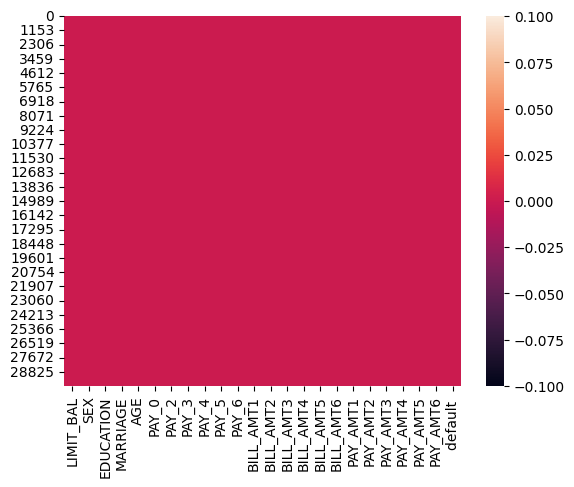

In [10]:
# Visualizing the missing values
sns.heatmap(df.isnull())
plt.show()

### What did you know about your dataset?

The dataset has 24 features, including the target variable with 30000 entries, with 35 duplicate values. There are no null values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns= df.columns.str.strip().str.lower()
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include= "all")

limit_bal    sex   education marriage           age  \
count     29965.000000  29965       29965    29965  29965.000000   
unique             NaN      2           6        4           NaN   
top                NaN      F  University   Single           NaN   
freq               NaN  18091       14019    15945           NaN   
mean     167442.005006    NaN         NaN      NaN     35.487969   
std      129760.135222    NaN         NaN      NaN      9.219459   
min       10000.000000    NaN         NaN      NaN     21.000000   
25%       50000.000000    NaN         NaN      NaN     28.000000   
50%      140000.000000    NaN         NaN      NaN     34.000000   
75%      240000.000000    NaN         NaN      NaN     41.000000   
max     1000000.000000    NaN         NaN      NaN     79.000000   

               pay_0         pay_2         pay_3         pay_4         pay_5  \
count   29965.000000  29965.000000  29965.000000  29965.000000  29965.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       -0.016753     -0.131854     -0.164392     -0.218922     -0.264509   
std         1.123492      1.196322      1.195878      1.168175      1.132220   
min        -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%        -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%         0.000000      0.000000      0.000000      0.000000      0.000000   
75%         0.000000      0.000000      0.000000      0.000000      0.000000   
max         8.000000      8.000000      8.000000      8.000000      8.000000   

        ...      bill_amt4      bill_amt5      bill_amt6       pay_amt1  \
count   ...   29965.000000   29965.000000   29965.000000   29965.000000   
unique  ...            NaN            NaN            NaN            NaN   
top     ...            NaN            NaN            NaN            NaN   
freq    ...            NaN            NaN            NaN            NaN   
mean    ...   43313.329885   40358.334390   38917.012281    5670.099316   
std     ...   64353.514373   60817.130623   59574.147742   16571.849467   
min     ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%     ...    2360.000000    1787.000000    1262.000000    1000.000000   
50%     ...   19081.000000   18130.000000   17124.000000    2102.000000   
75%     ...   54601.000000   50247.000000   49252.000000    5008.000000   
max     ...  891586.000000  927171.000000  961664.000000  873552.000000   

            pay_amt2       pay_amt3       pay_amt4       pay_amt5  \
count   2.996500e+04   29965.000000   29965.000000   29965.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean    5.927983e+03    5231.688837    4831.617454    4804.897047   
std     2.305346e+04   17616.361124   15674.464538   15286.372298   
min     0.000000e+00       0.000000       0.000000       0.000000   
25%     8.500000e+02     390.000000     300.000000     261.000000   
50%     2.010000e+03    1804.000000    1500.000000    1500.000000   
75%     5.000000e+03    4512.000000    4016.000000    4042.000000   
max     1.684259e+06  896040.000000  621000.000000  426529.000000   

             pay_amt6  default  
count    29965.000000    29965  
unique            NaN        2  
top               NaN        N  
freq              NaN    23335  
mean      5221.498014      NaN  
std      17786.976864      NaN  
min          0.000000      NaN  
25%        131.000000      NaN  
50%       1500.000000      NaN  
75%       4000.000000      NaN  
max     528666.000000      NaN  

[11 rows x 24 columns]

### Variables Description 

**limit_bal-** Amount of given credit (NT dollars)

**sex-** Sex of the Client(M/F)

**education-** Educational Qualification of the Client
       University, Graduate School, High School, Others, 0, Unknown 
       
**marriage-** Marital Status of the Client
        Single, Married, Other, 0
        
**age-** Age of the Client

**pay_0-** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight - months, 9=payment delay for nine months and above)

**pay_2-** Repayment status in August, 2005 (scale same as above)

**pay_3-** Repayment status in July, 2005 (scale same as above)

**pay_4-** Repayment status in June, 2005 (scale same as above)

**pay_5-** Repayment status in May, 2005 (scale same as above)

**pay_6-** Repayment status in April, 2005 (scale same as above)

**bill_amt1-** Amount of bill statement in September, 2005 (NT dollar)

**bill_amt2-** Amount of bill statement in August, 2005 (NT dollar)

**bill_amt3-** Amount of bill statement in July, 2005 (NT dollar)

**bill_amt4-** Amount of bill statement in June, 2005 (NT dollar)

**bill_amt5-** Amount of bill statement in May, 2005 (NT dollar)

**bill_amt6-** Amount of bill statement in April, 2005 (NT dollar)

**pay_amt1-** Amount of previous payment in September, 2005 (NT dollar)

**pay_amt2-** Amount of previous payment in August, 2005 (NT dollar)

**pay_amt3-** Amount of previous payment in July, 2005 (NT dollar)

**pay_amt4-** Amount of previous payment in June, 2005 (NT dollar)

**pay_amt5-** Amount of previous payment in May, 2005 (NT dollar)

**pay_amt6-** Amount of previous payment in April, 2005 (NT dollar)

**default-** Whether the client has defaulted on loan payment.
        0- Not Defaulted
        1- Defaulted

In [13]:
#making a copy of df for later use in model building
df_model= df.copy()

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for feature in df.columns:
    print(f"Number of Unique Values in {feature}: {df[feature].nunique()}")
    if df[feature].nunique()/len(df)<= 0.10:
        print(df[feature].value_counts())
    print("---------------------------------")

Number of Unique Values in limit_bal: 81
limit_bal
50000      3363
20000      1975
30000      1610
80000      1564
200000     1524
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: count, Length: 81, dtype: int64
---------------------------------
Number of Unique Values in sex: 2
sex
F    18091
M    11874
Name: count, dtype: int64
---------------------------------
Number of Unique Values in education: 6
education
University         14019
Graduate school    10563
High School         4915
Unknown              331
Others               123
0                     14
Name: count, dtype: int64
---------------------------------
Number of Unique Values in marriage: 4
marriage
Single     15945
Married    13643
Other        323
0             54
Name: count, dtype: int64
---------------------------------
Number of Unique Values in age: 56
age
29    1602
27    1475
28    1406
30    1394
26    1252
31    1213
25    1185
34    1161
32    1157
33    1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
df= df.astype({
    cat_column: "category" for cat_column in ["sex", "education", "marriage", "pay_0", "pay_2", "pay_3", "pay_4", "pay_5", "pay_6", "default"]
})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   limit_bal  29965 non-null  int64   
 1   sex        29965 non-null  category
 2   education  29965 non-null  category
 3   marriage   29965 non-null  category
 4   age        29965 non-null  int64   
 5   pay_0      29965 non-null  category
 6   pay_2      29965 non-null  category
 7   pay_3      29965 non-null  category
 8   pay_4      29965 non-null  category
 9   pay_5      29965 non-null  category
 10  pay_6      29965 non-null  category
 11  bill_amt1  29965 non-null  int64   
 12  bill_amt2  29965 non-null  int64   
 13  bill_amt3  29965 non-null  int64   
 14  bill_amt4  29965 non-null  int64   
 15  bill_amt5  29965 non-null  int64   
 16  bill_amt6  29965 non-null  int64   
 17  pay_amt1   29965 non-null  int64   
 18  pay_amt2   29965 non-null  int64   
 19  pay_amt3   29965 non-null

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [17]:
numerical_cols= list(df.select_dtypes(np.number).columns)

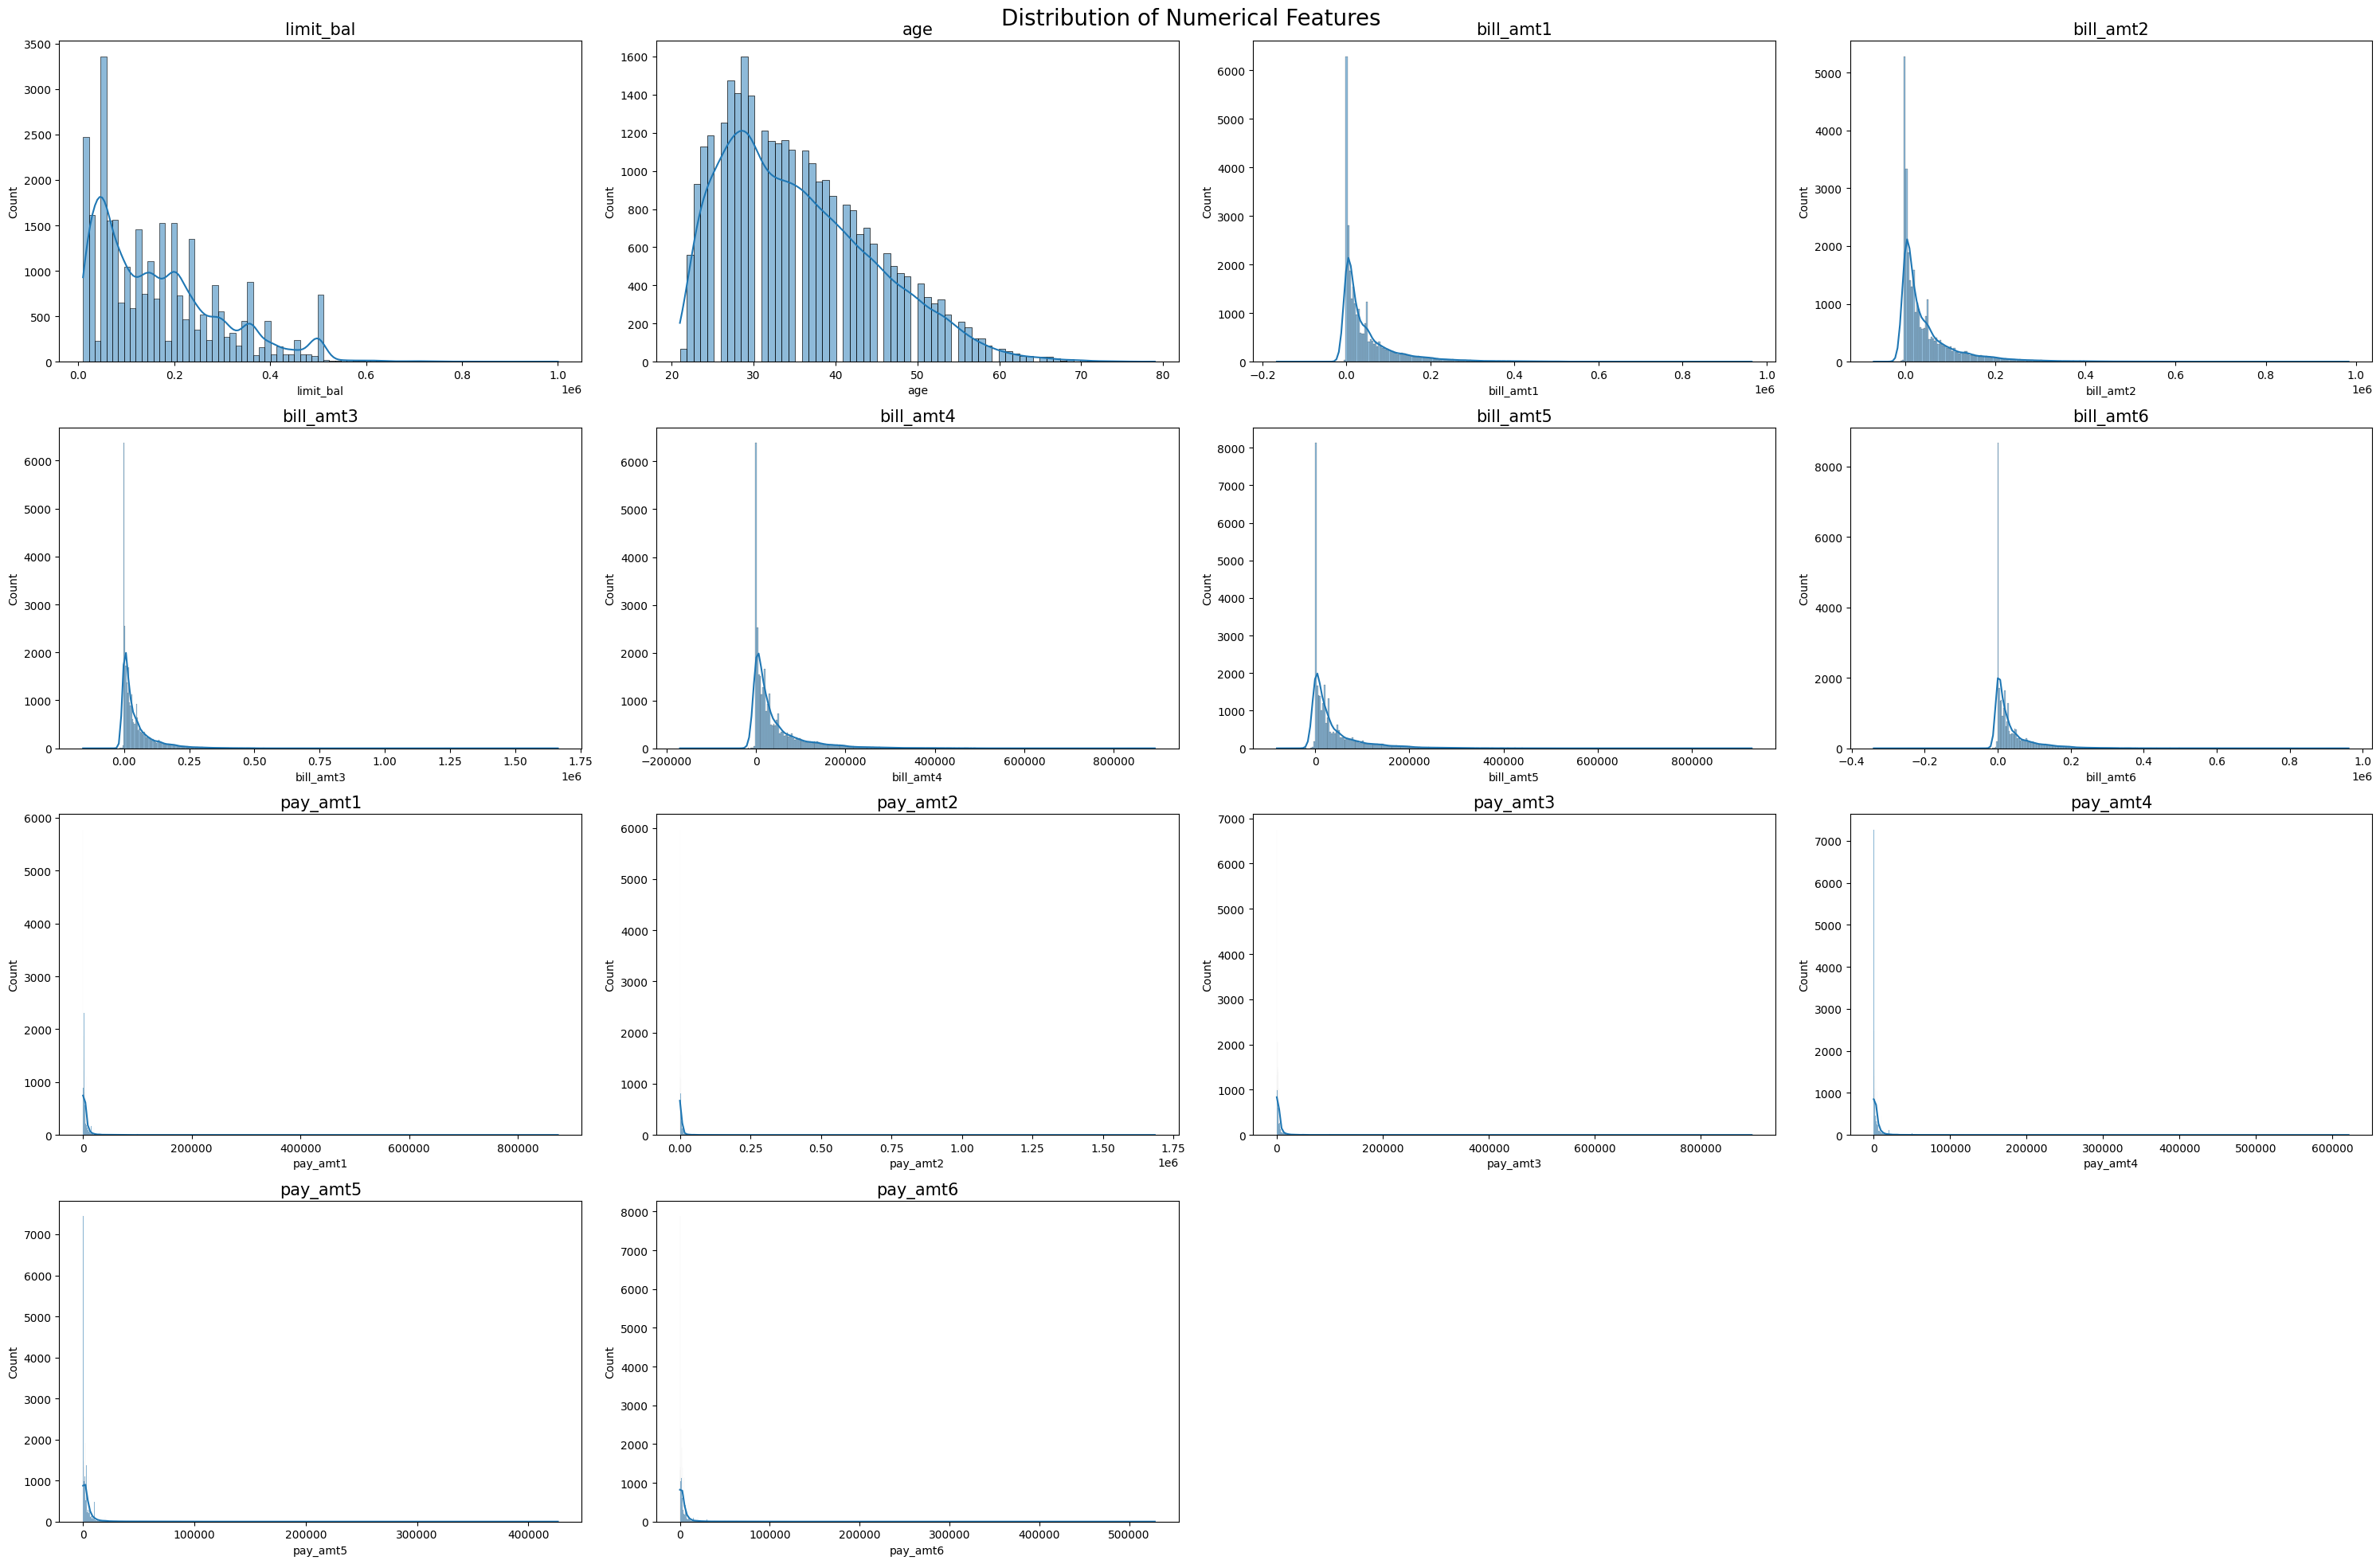

In [18]:
# Chart - 1 visualization code
fig, axes= plt.subplots(4, 4, figsize= (30, 20))
axes= axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data= df, x= col, kde= True, ax= axes[i])
    axes[i].set_title(col, fontsize= 15)
    
for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])

    
plt.suptitle("Distribution of Numerical Features", fontsize= 20)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are suitable for visualizing the distribution of numerical data, making them an excellent choice for exploring the distributions of features like "limit_bal", "age", "bill_amt1" through "bill_amt6", and "pay_amt1" through "pay_amt6". They allow for easy identification of patterns such as skewness, central tendency, and presence of outliers within each feature.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of credit limits and ages can aid in tailoring specific credit offerings and services to different customer segments. Analyzing bill and payment amounts can help in developing better debt management strategies and customizing repayment options for customers. This, in turn, can improve customer satisfaction, retention, and loyalty.
However, if the analysis reveals a skewed or unexpected distribution of credit limits or ages, it might necessitate a reassessment of the target customer base and potentially lead to a need for more diverse credit offerings. Additionally, if a significant portion of clients is consistently late with payments or has an unusual bill payment pattern, it might signal financial instability or potential default risks, which would require the implementation of stricter credit policies and risk management strategies.


#### Chart - 2

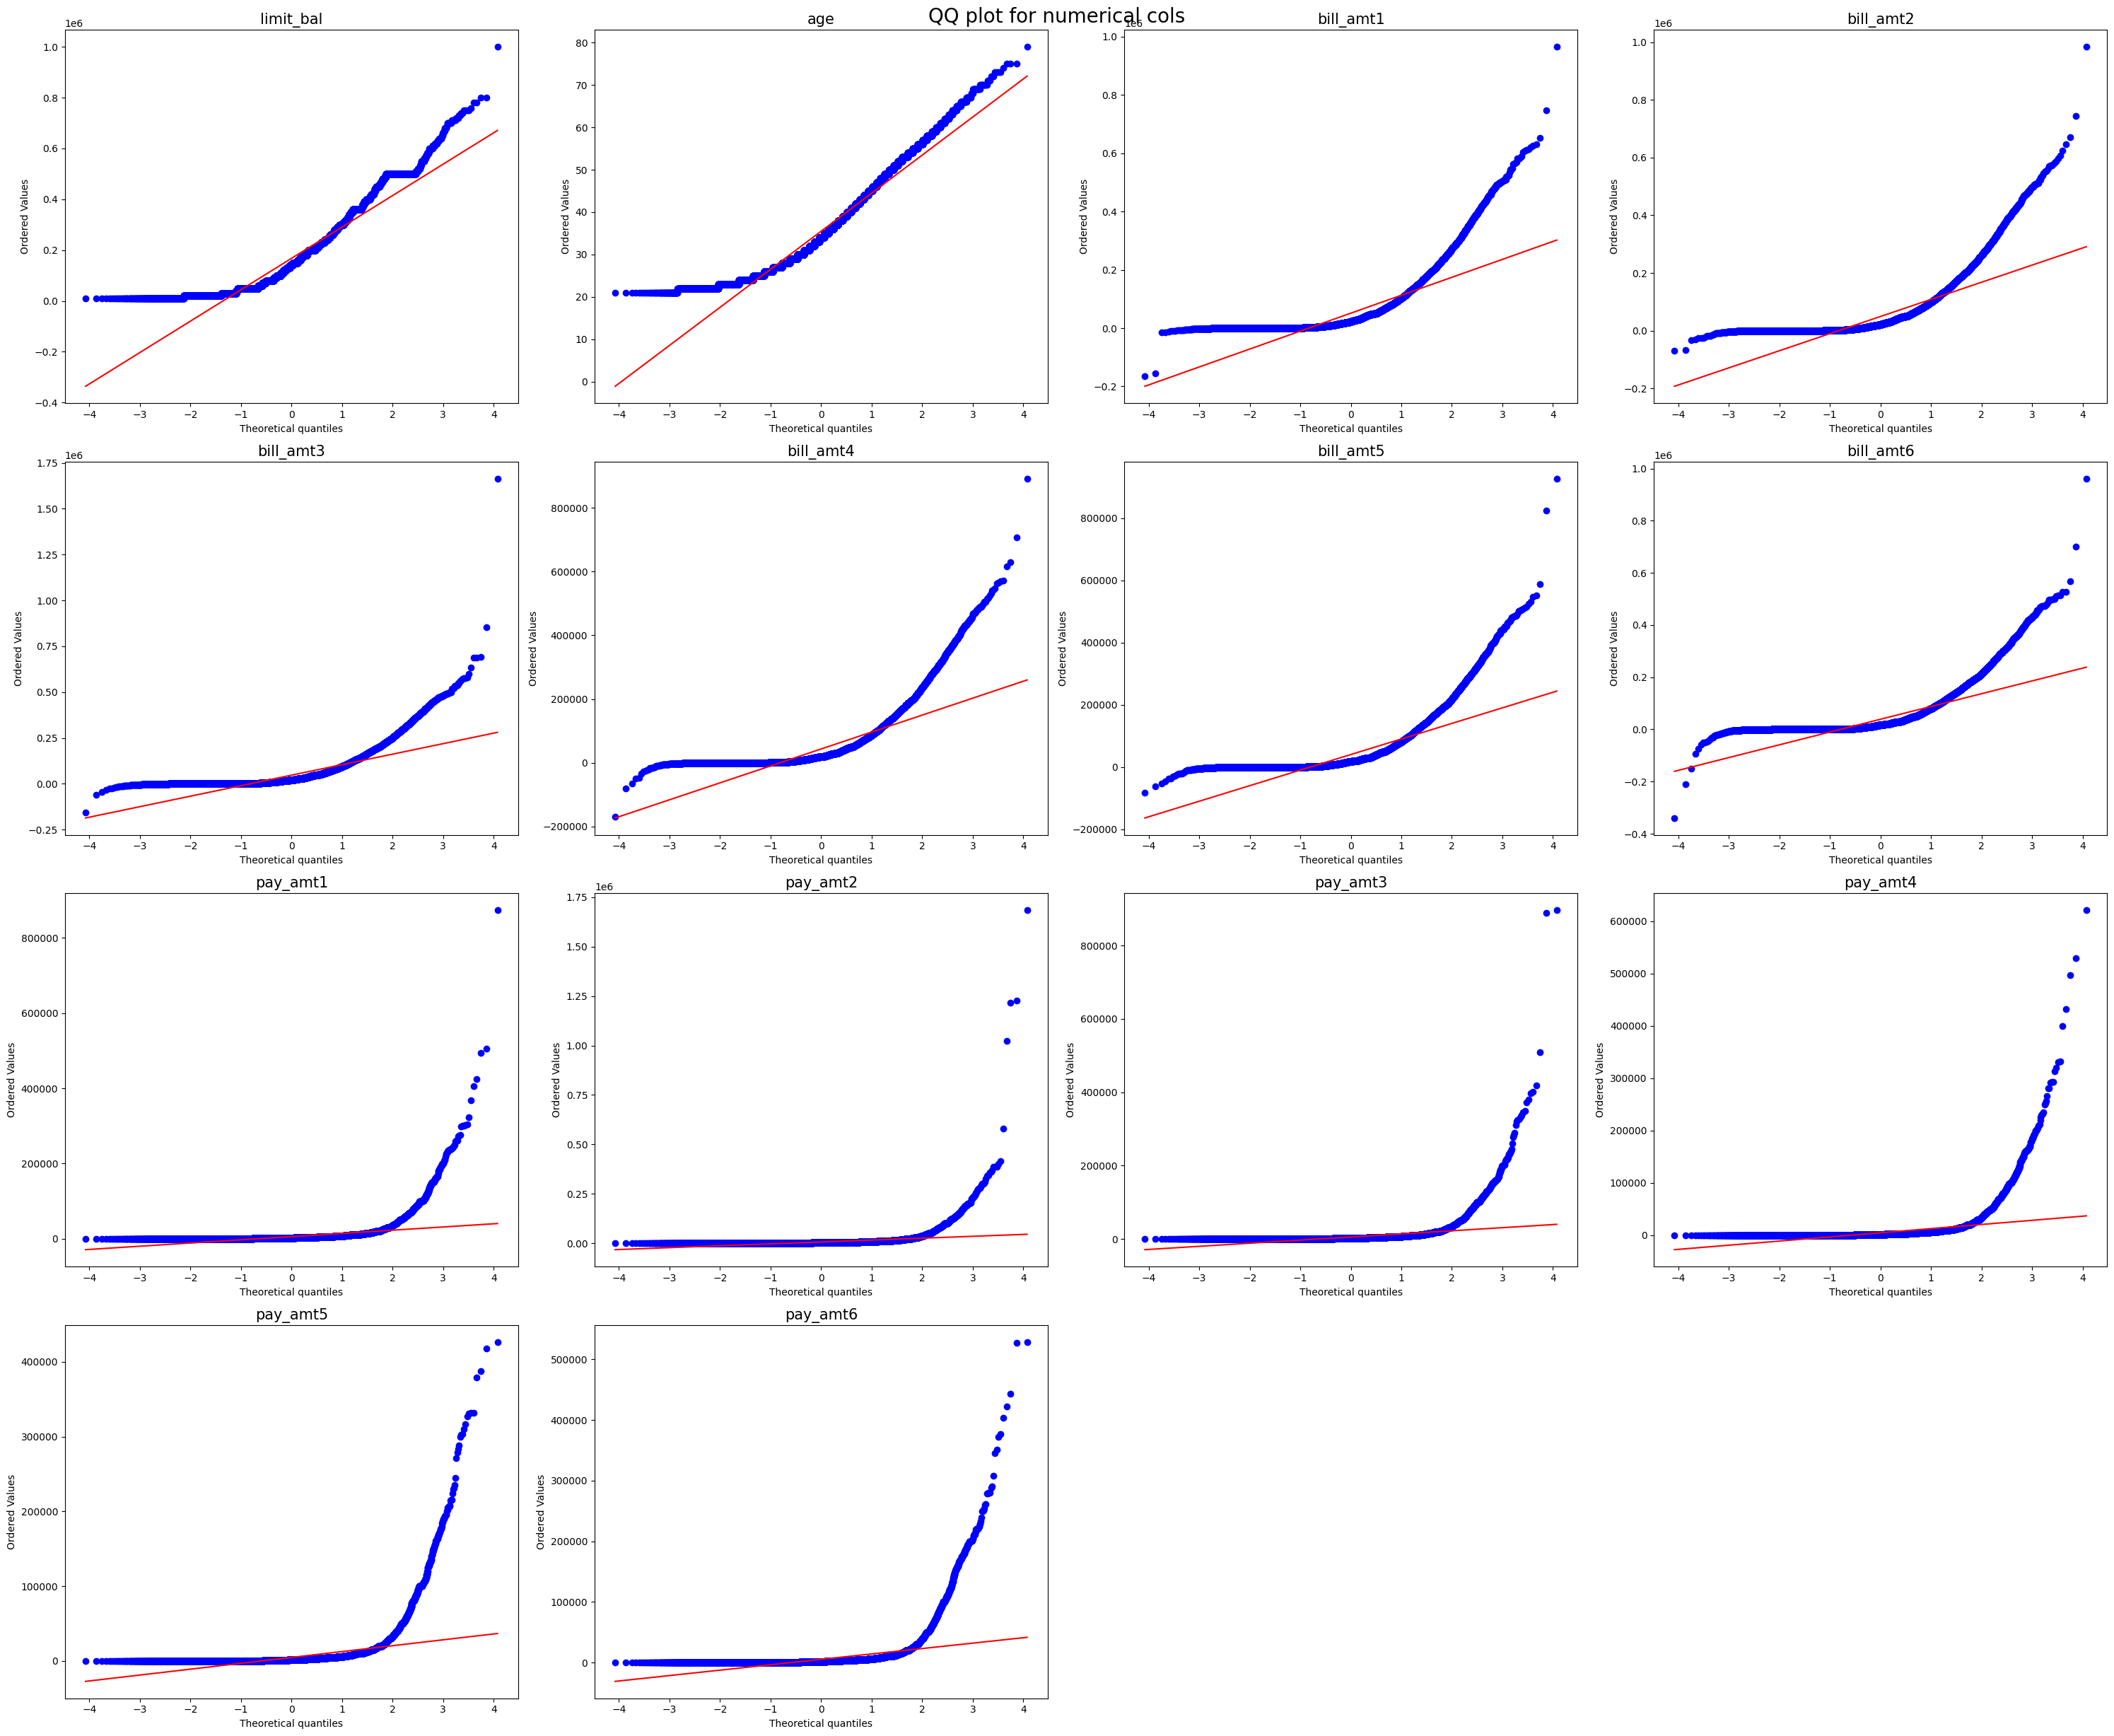

In [19]:
# Chart - 2 visualization code
fig, axes= plt.subplots(4, 4, figsize= (30, 25))
axes= axes.flatten()

for i, col in enumerate(numerical_cols):
    stats.probplot(x= df[col], plot= axes[i])
#     probplot[0].set_markerfacecolor('#1f77b4')
    axes[i].set_title(col, fontsize= 15)
    
for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])
    
plt.suptitle("QQ plot for numerical cols", fontsize= 20)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

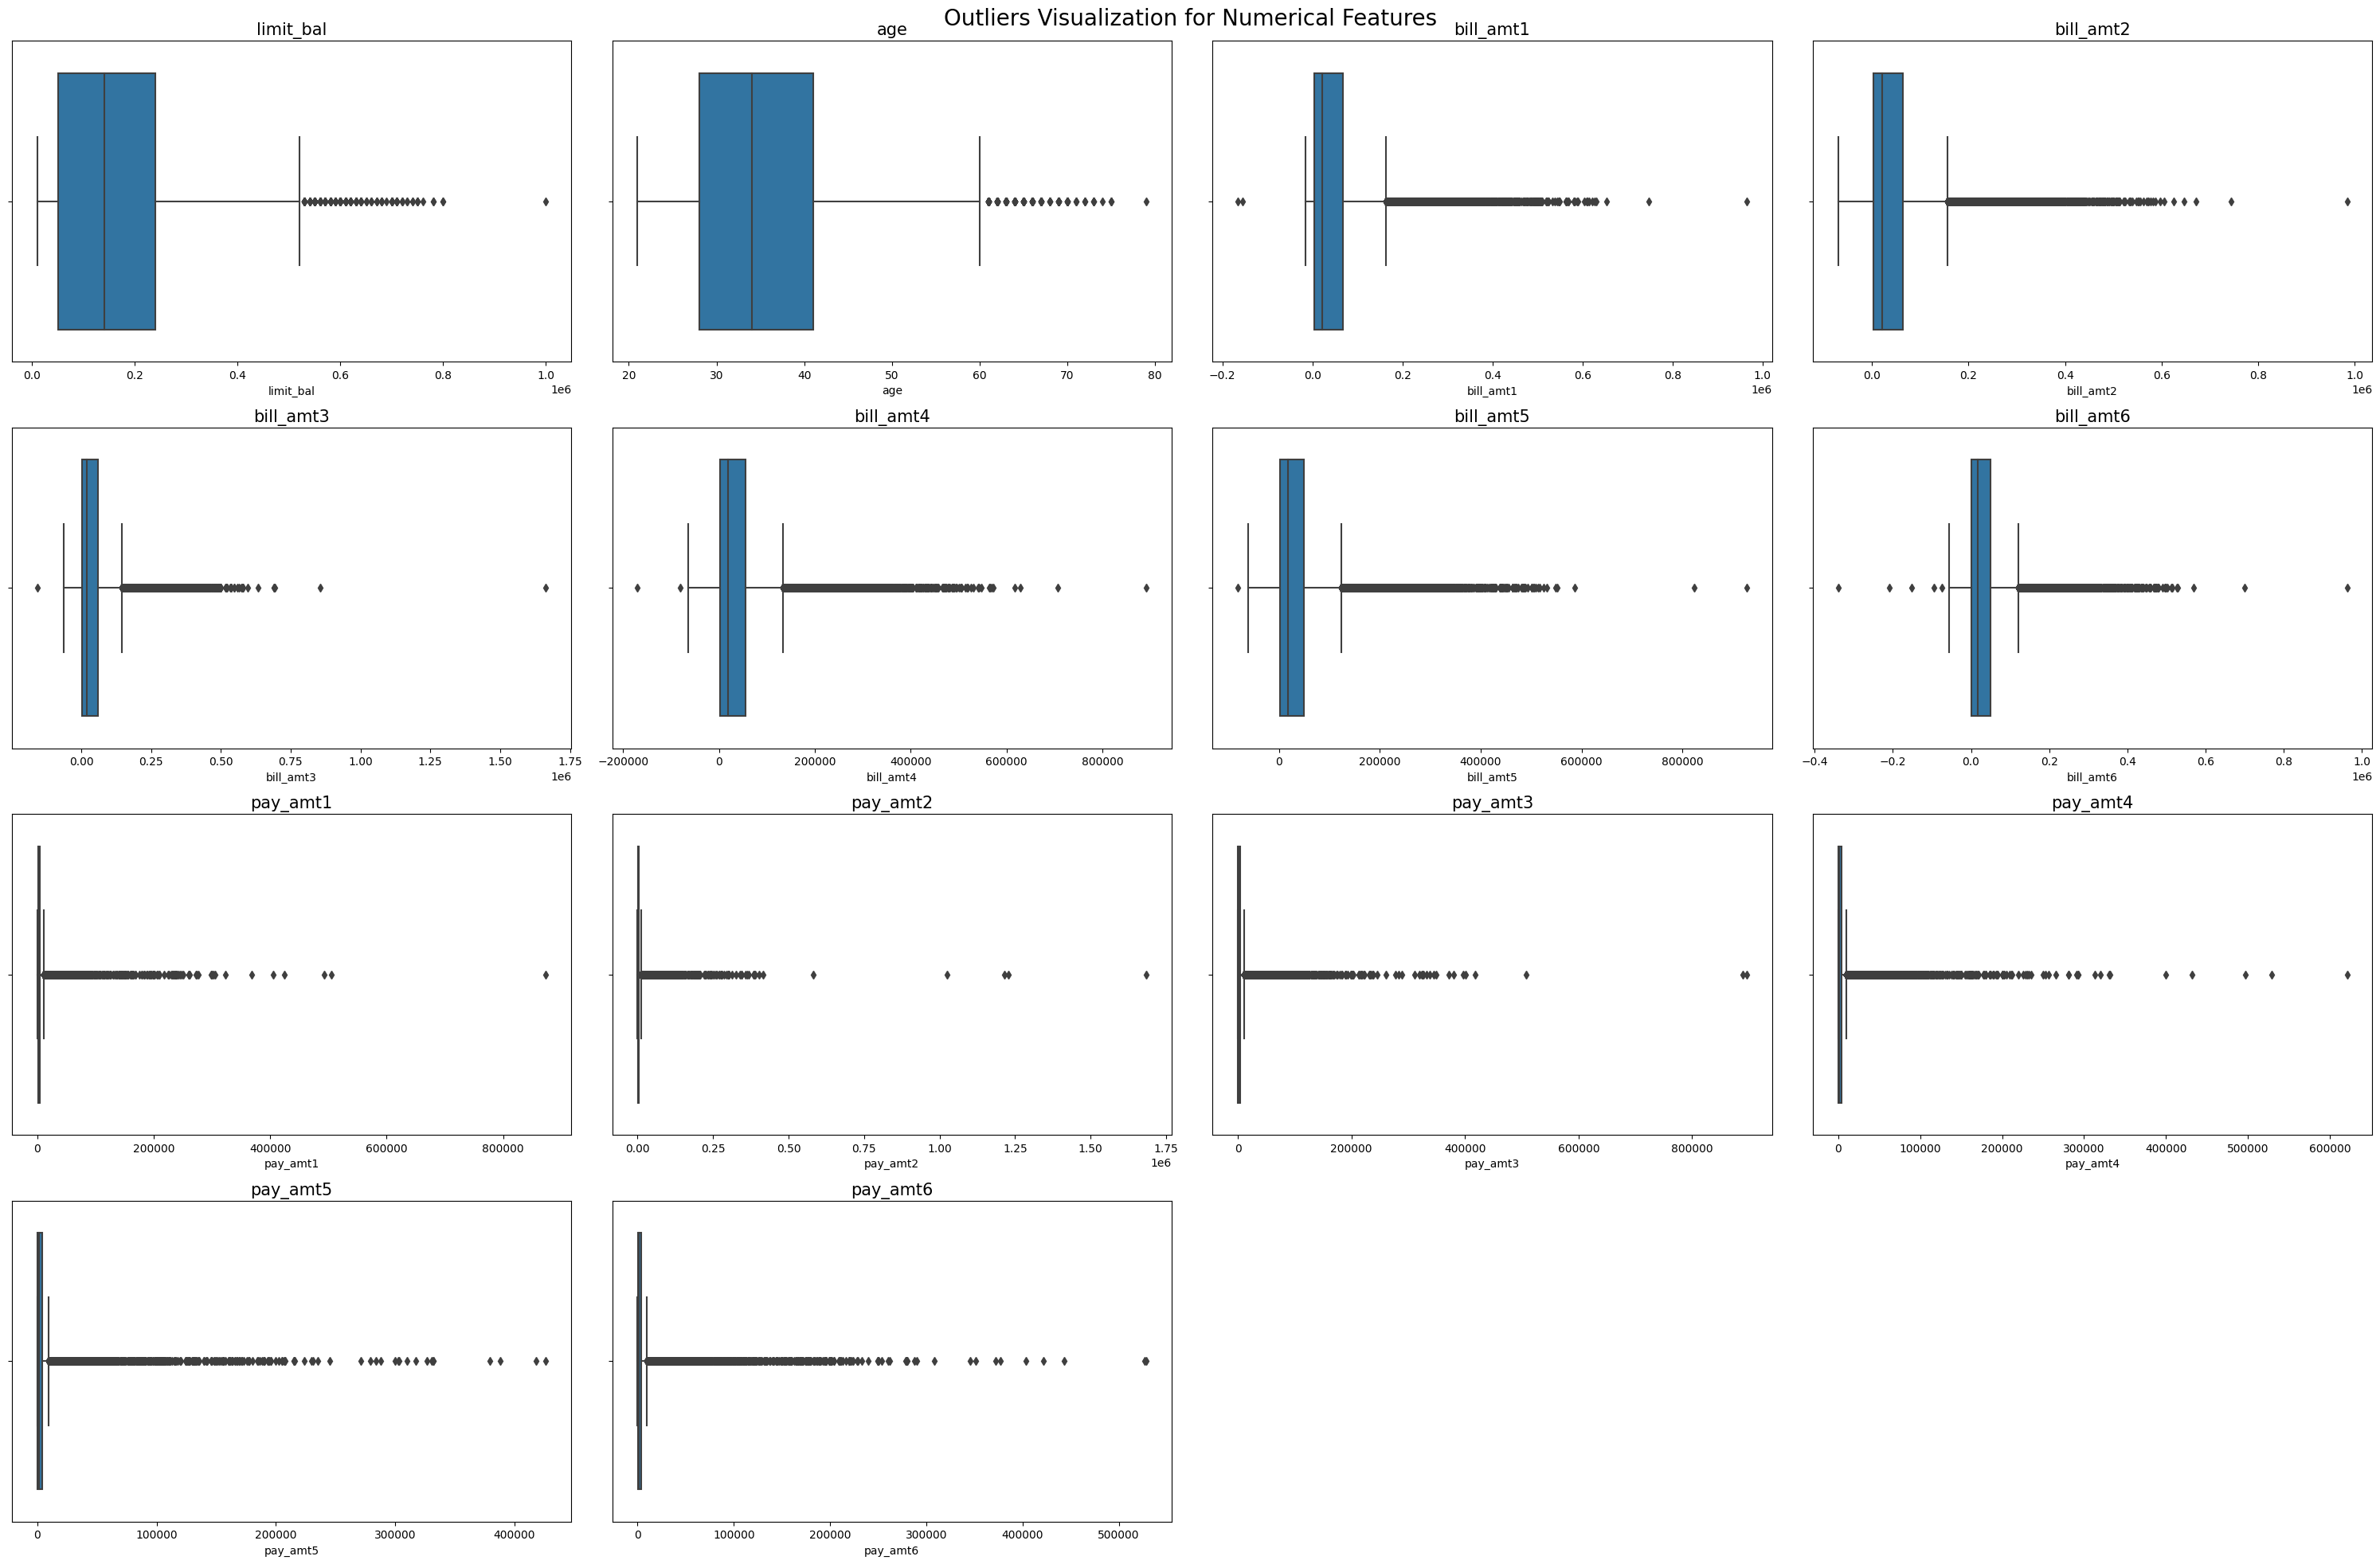

In [20]:
# Chart - 3 visualization code
fig, axes= plt.subplots(4, 4, figsize= (30, 20))
axes= axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data= df, x= col, ax= axes[i])
    axes[i].set_title(col, fontsize= 15)

for i in range(len(numerical_cols), 16): 
    fig.delaxes(axes[i])

plt.suptitle("Outliers Visualization for Numerical Features", fontsize= 20)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [21]:
categorical_cols= list(df.select_dtypes("category").columns)

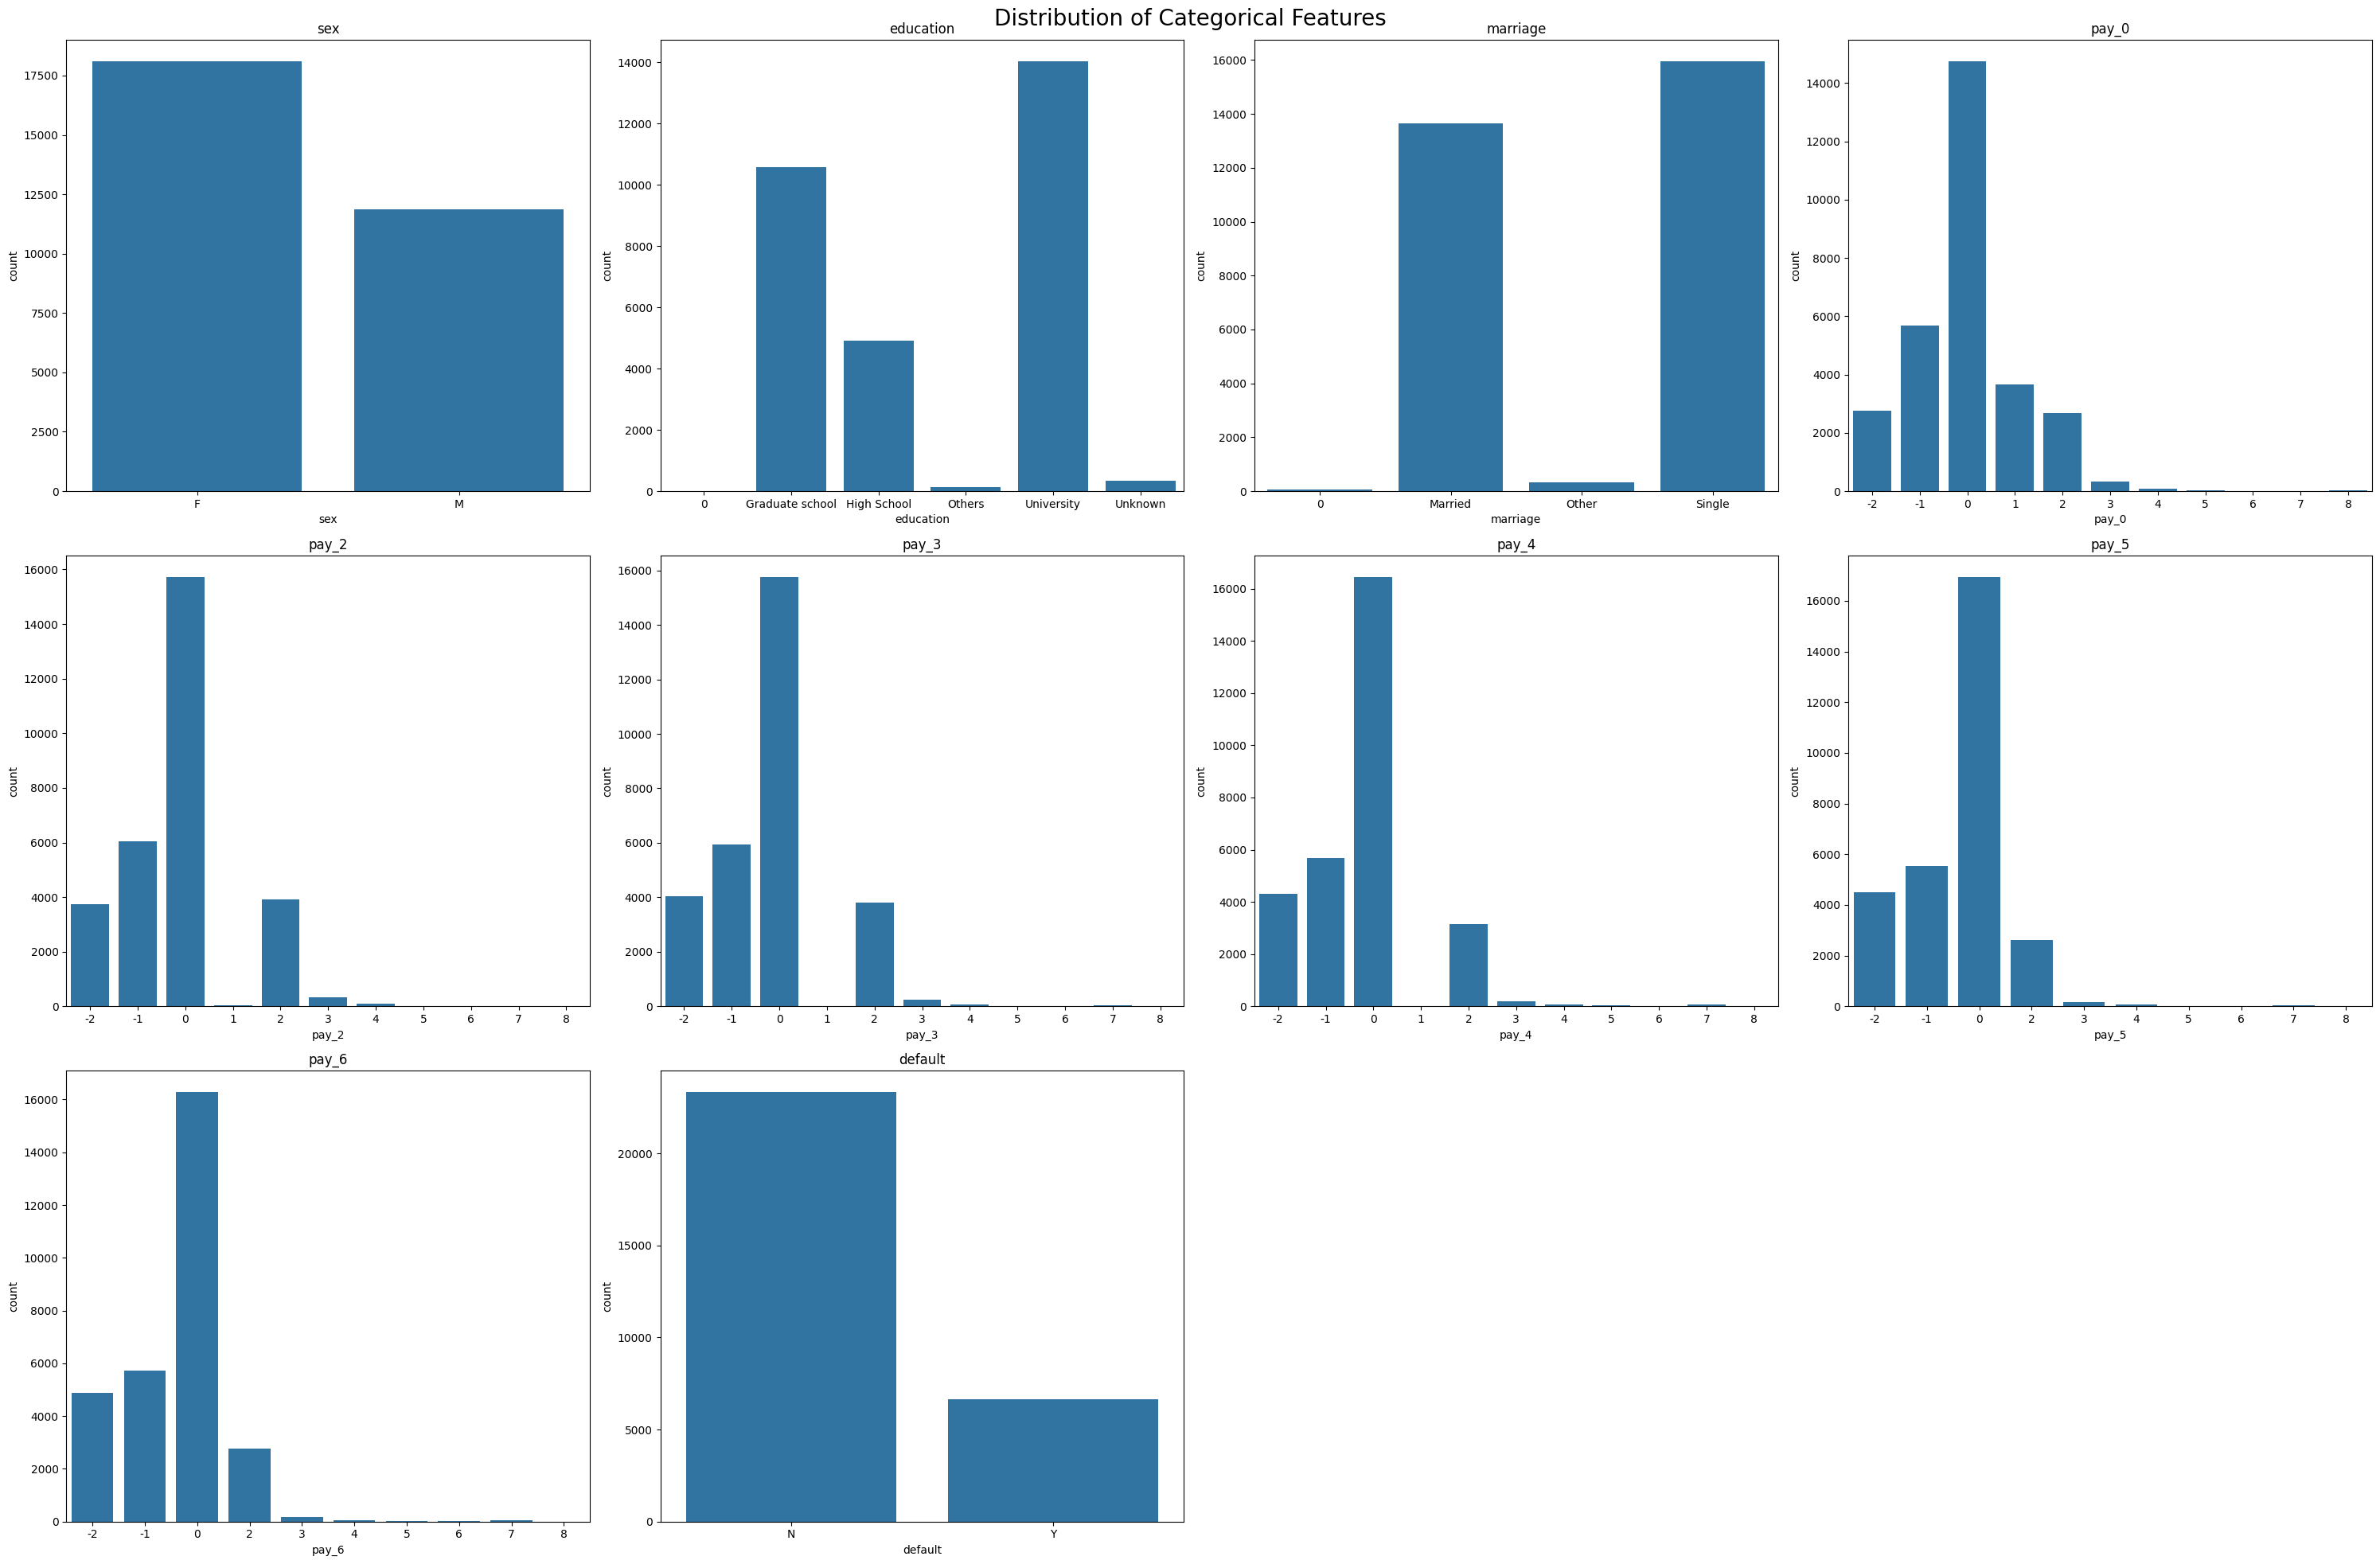

In [22]:
# Chart - 4 visualization code
fig, axes= plt.subplots(3, 4, figsize= (30, 20))
axes= axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data= df, x= col, color= "#1f77b4", ax= axes[i])
    axes[i].set_title(col)

for i in range(len(categorical_cols), 12):
    fig.delaxes(axes[i])

plt.suptitle("Distribution of Categorical Features", fontsize= 20)
    
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

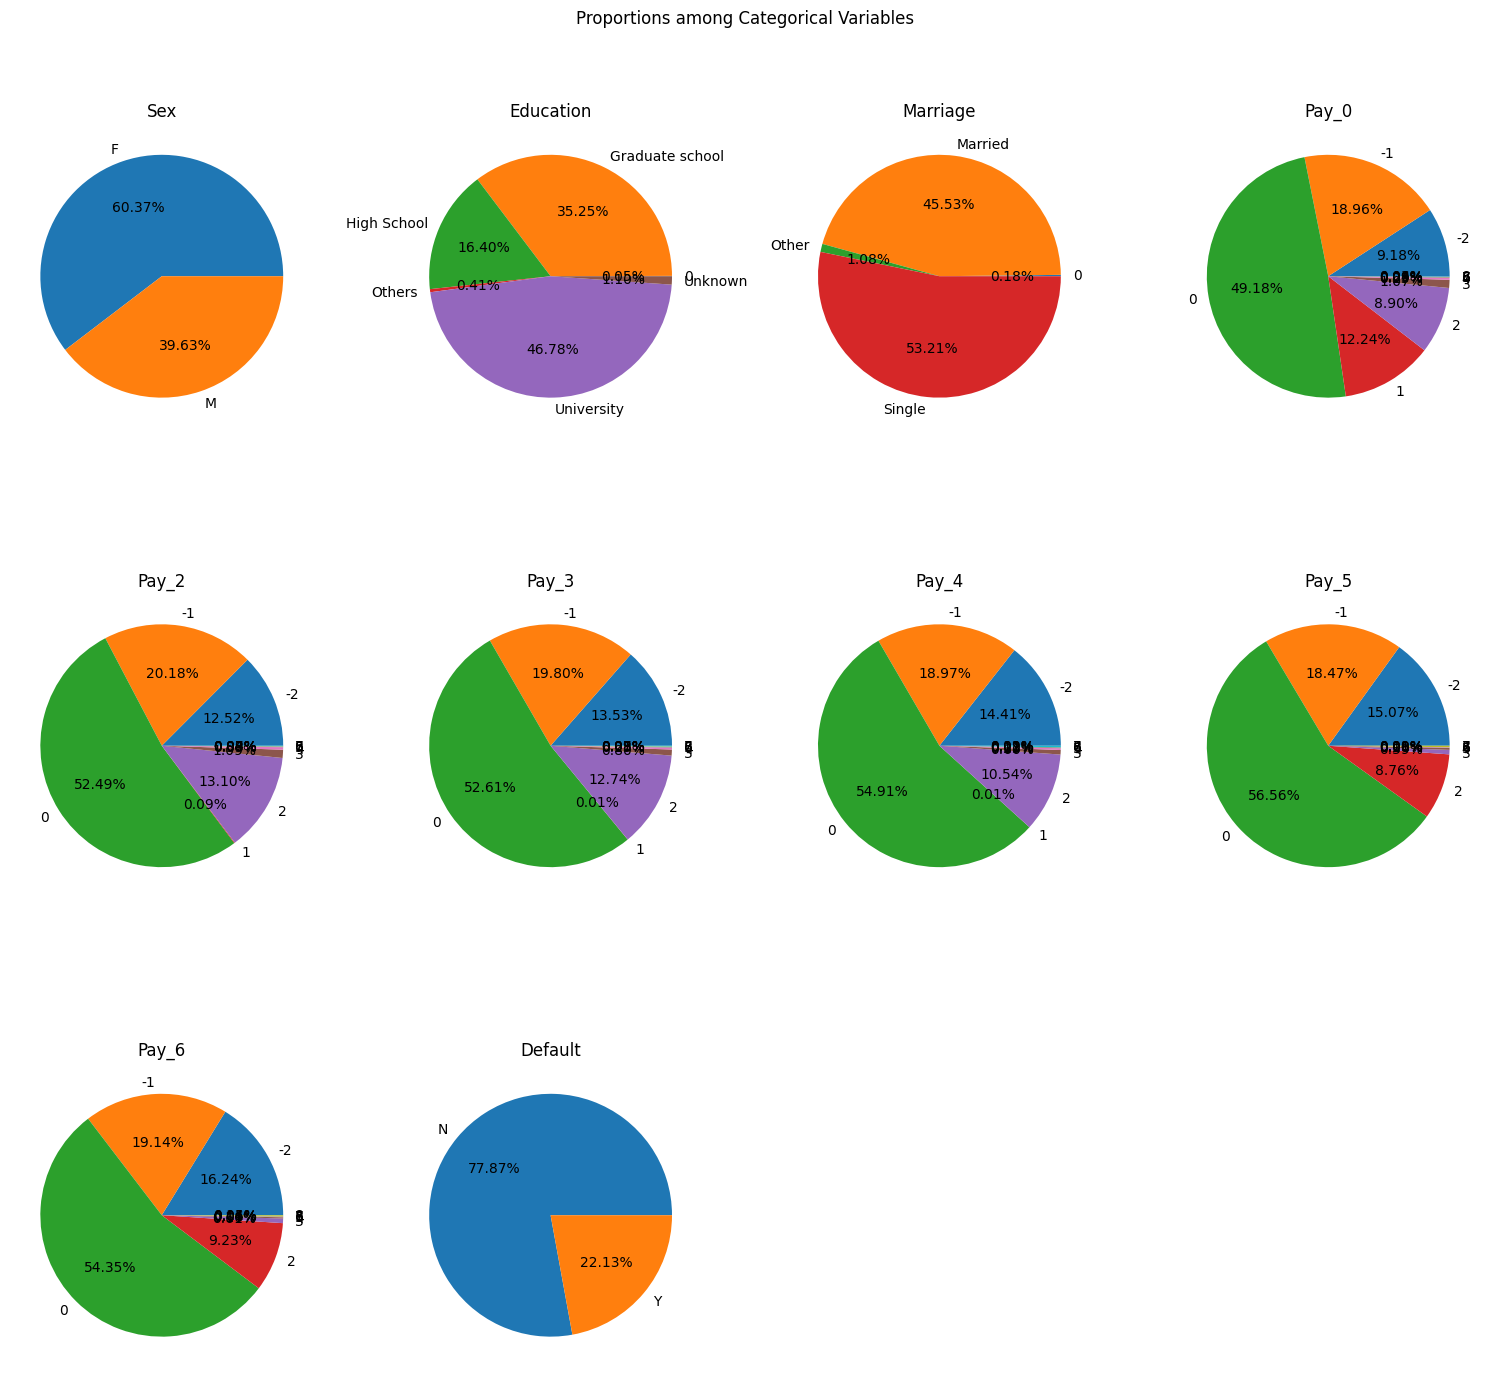

In [23]:
# Chart - 5 visualization code

fig, axes= plt.subplots(3, 4, figsize= (15, 15))
axes= axes.flatten()

for i, col in enumerate(categorical_cols):
    pie_df= df.groupby(col).size().reset_index().rename(columns= {0: "size"})
    axes[i].pie(
        data= pie_df, labels= col, x= "size",
        autopct= "%.2f%%"
    )
    axes[i].set_title(col.title())
    
for i in range(len(categorical_cols), 12):
    fig.delaxes(axes[i])

plt.suptitle("Proportions among Categorical Variables")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

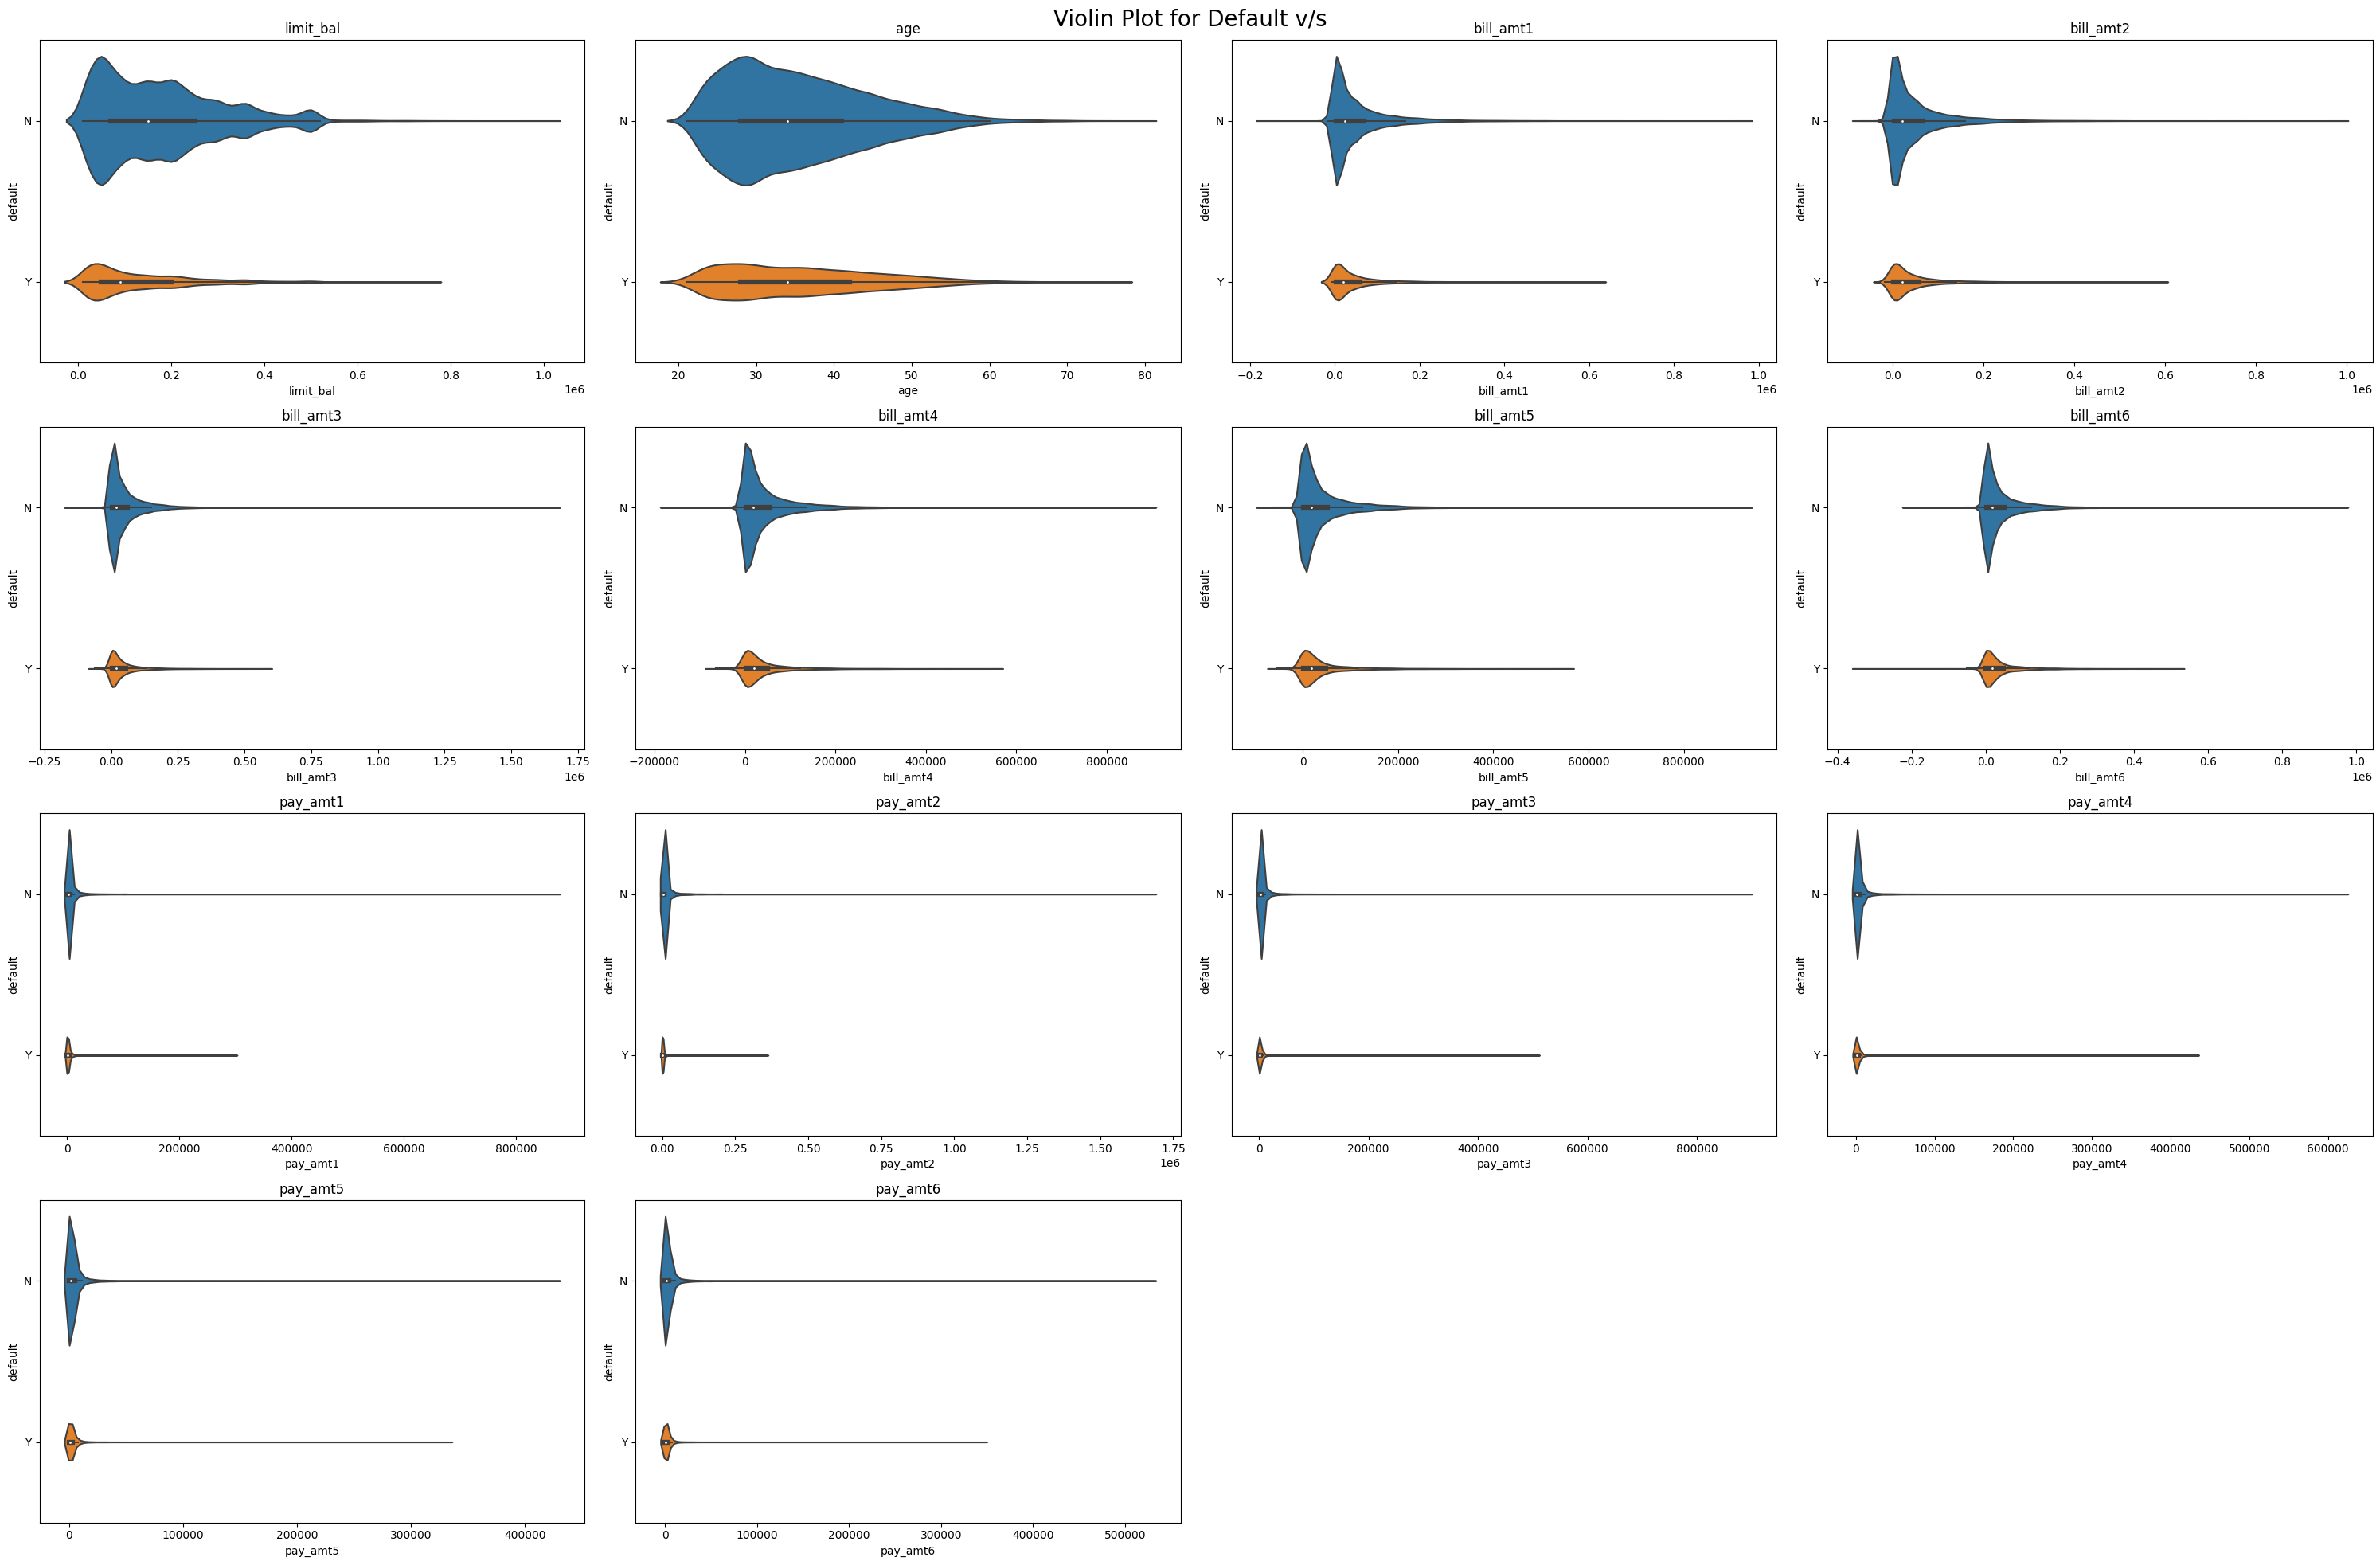

In [24]:
# Chart - 7 visualization code
#bivariate analysis

#violin plots

fig, axes= plt.subplots(4, 4, figsize= (30, 20))
axes= axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(
        data= df, 
        x= col, y= "default", scale= "count",
        ax= axes[i]
    )
    axes[i].set_title(col)
#     axes[i].set_ylabel("default", fontsize= 10)
    
for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])
    
plt.suptitle("Violin Plot for Default v/s", fontsize= 20)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

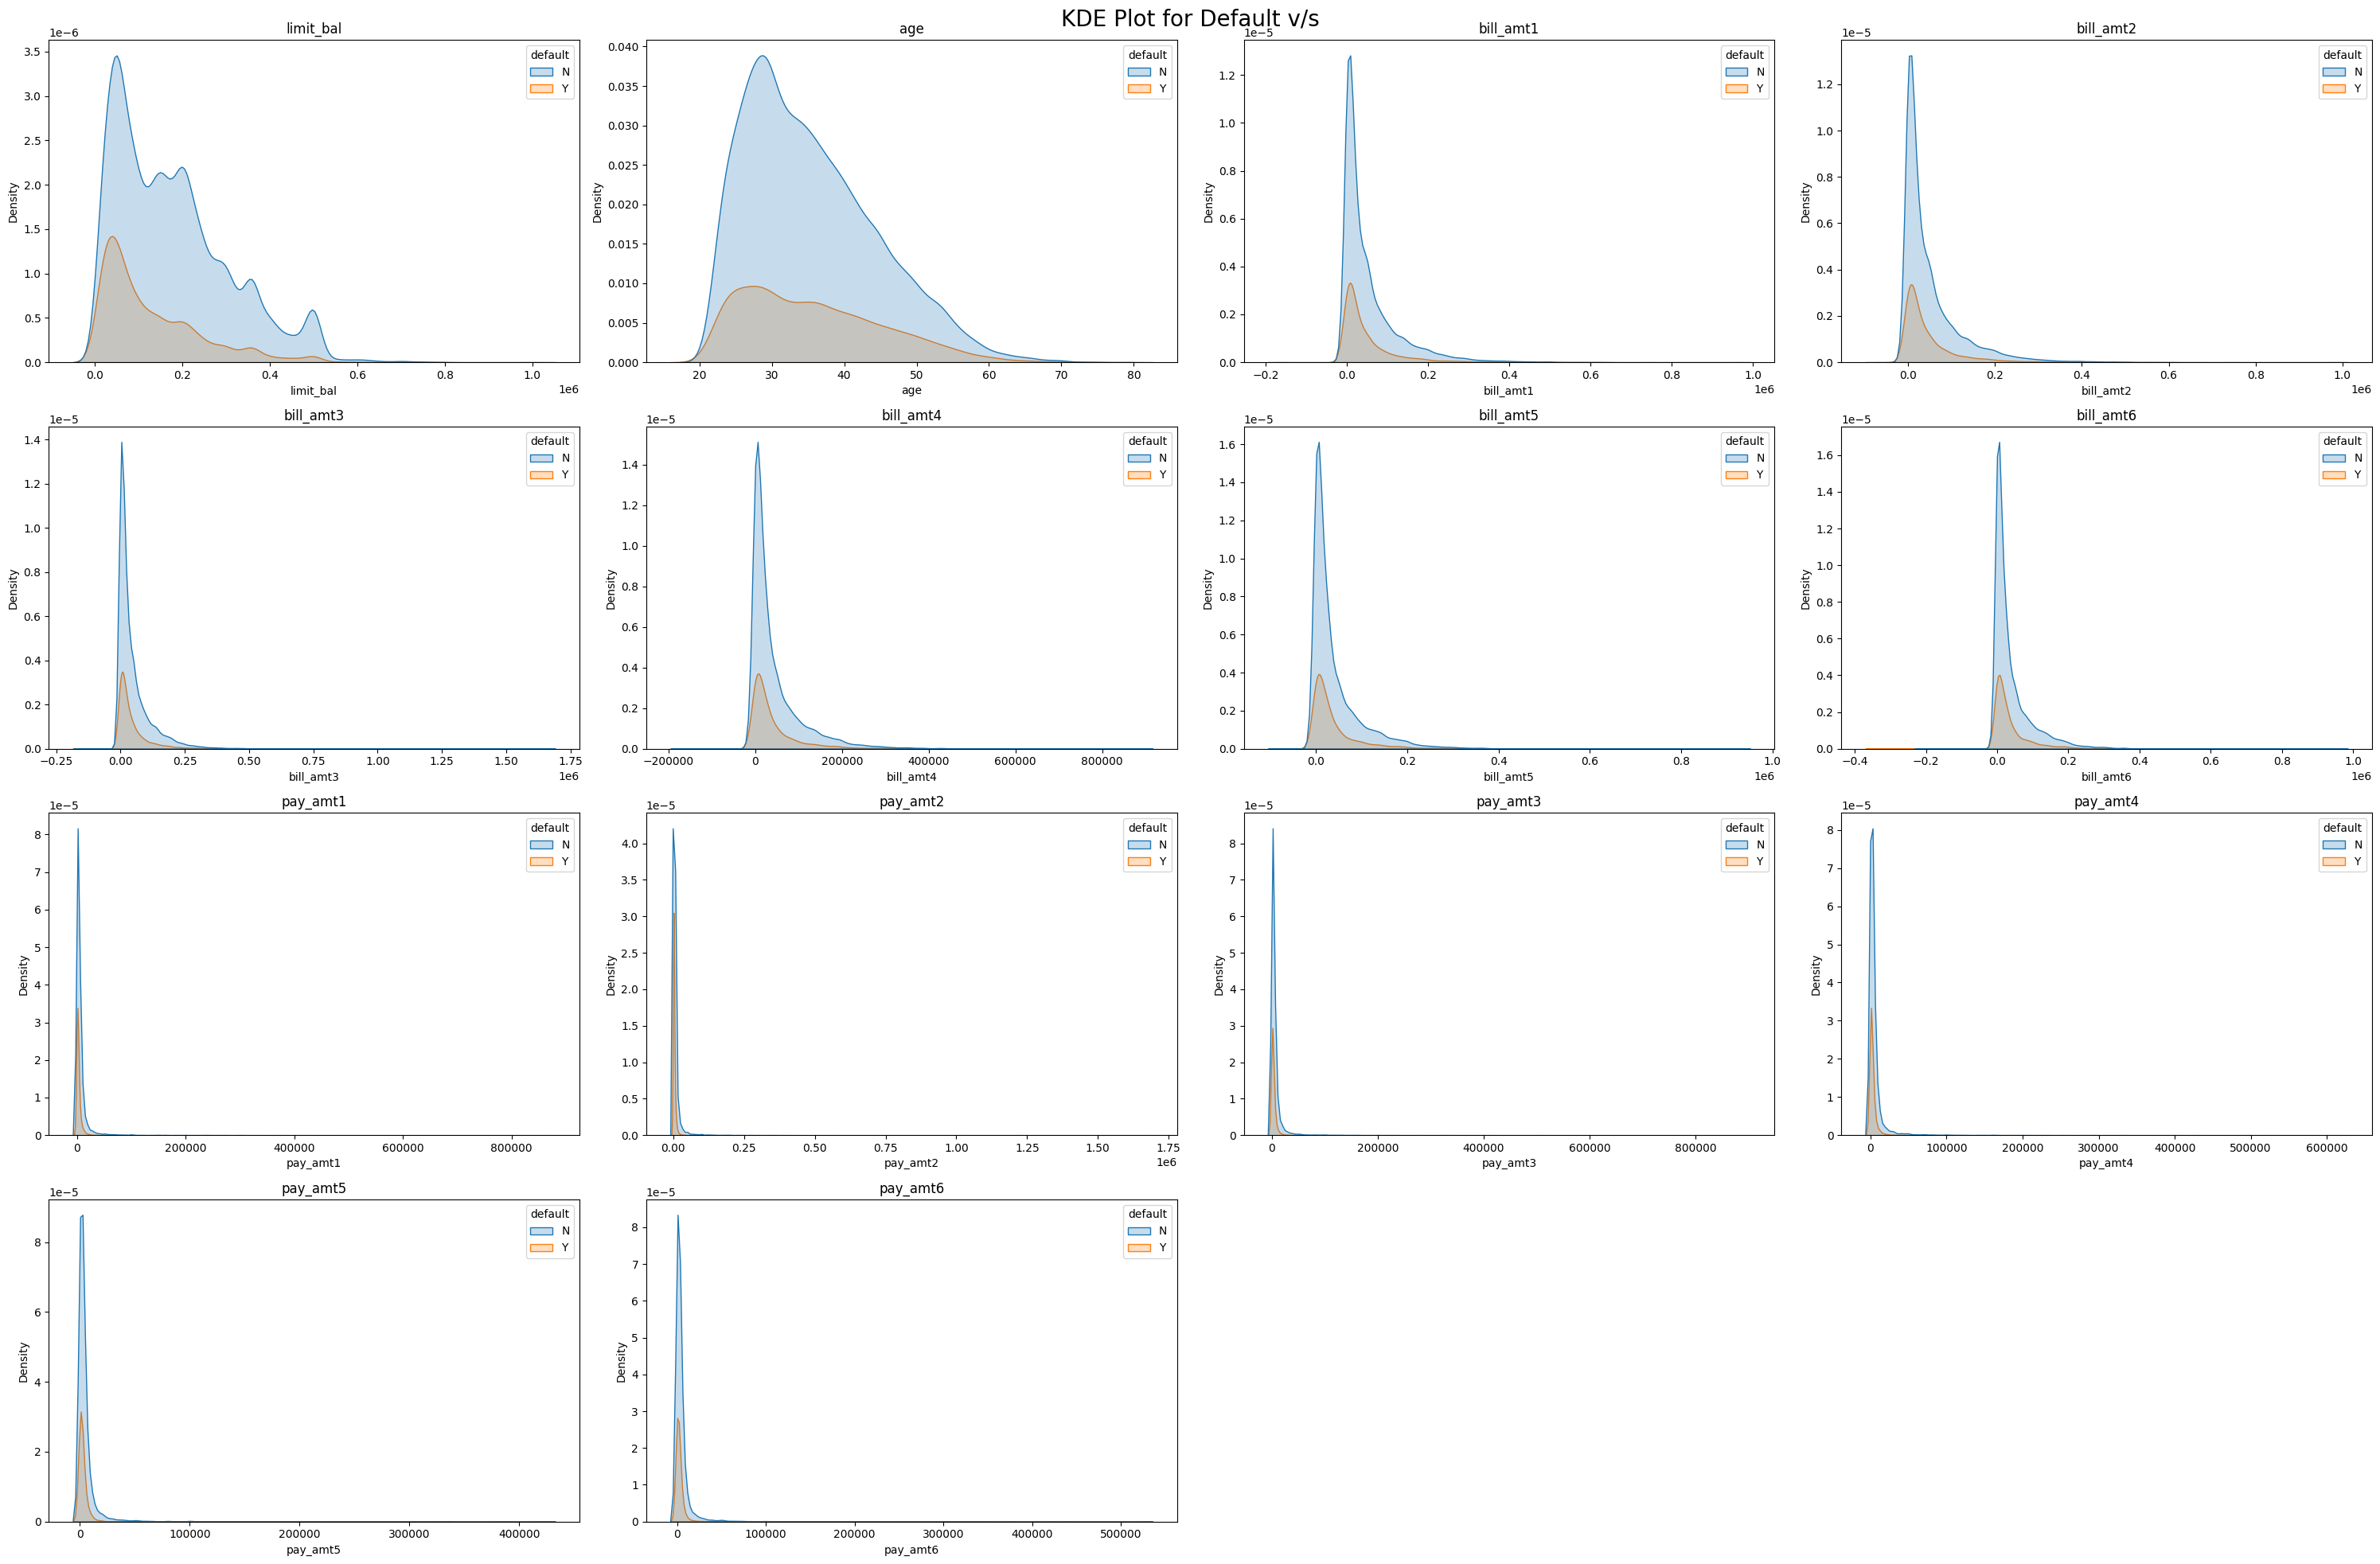

In [25]:
# Chart - 8 visualization code
#kde plot

fig, axes= plt.subplots(4, 4, figsize= (30, 20))
axes= axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.kdeplot(data= df, x= col, hue= "default",
                fill= True, ax= axes[i])
    axes[i].set_title(col)
    
for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])
    
plt.suptitle("KDE Plot for Default v/s", fontsize= 20)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

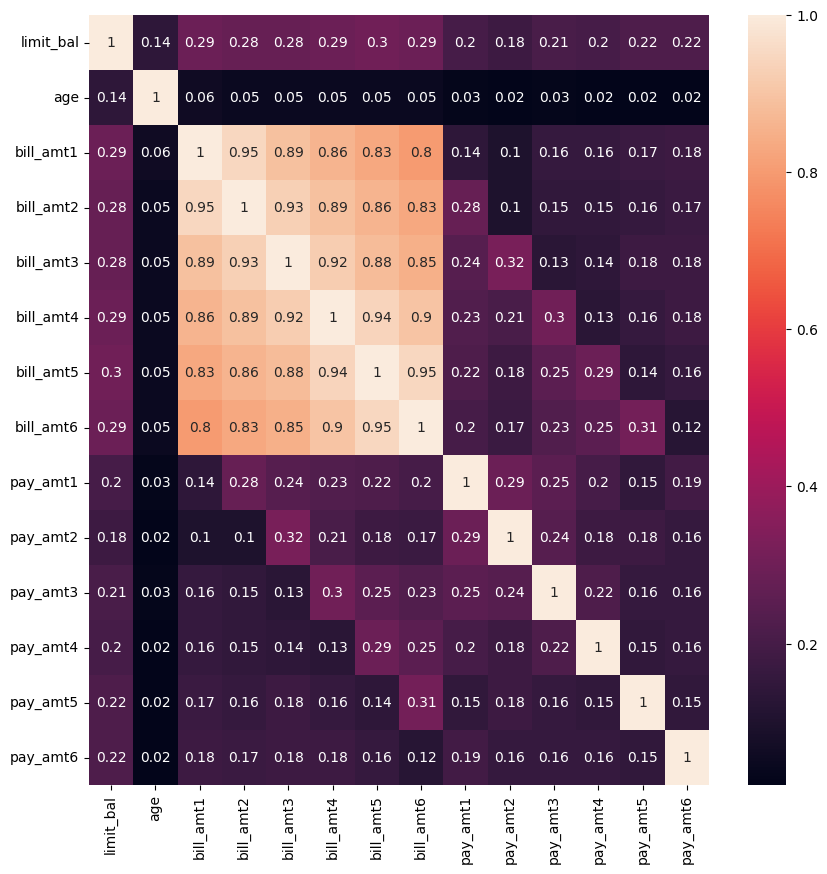

In [26]:
# Chart - 9 visualization code
#correlation heatmap

fig= plt.figure(figsize= (10, 10))
sns.heatmap(df[numerical_cols].corr().round(2), annot= True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

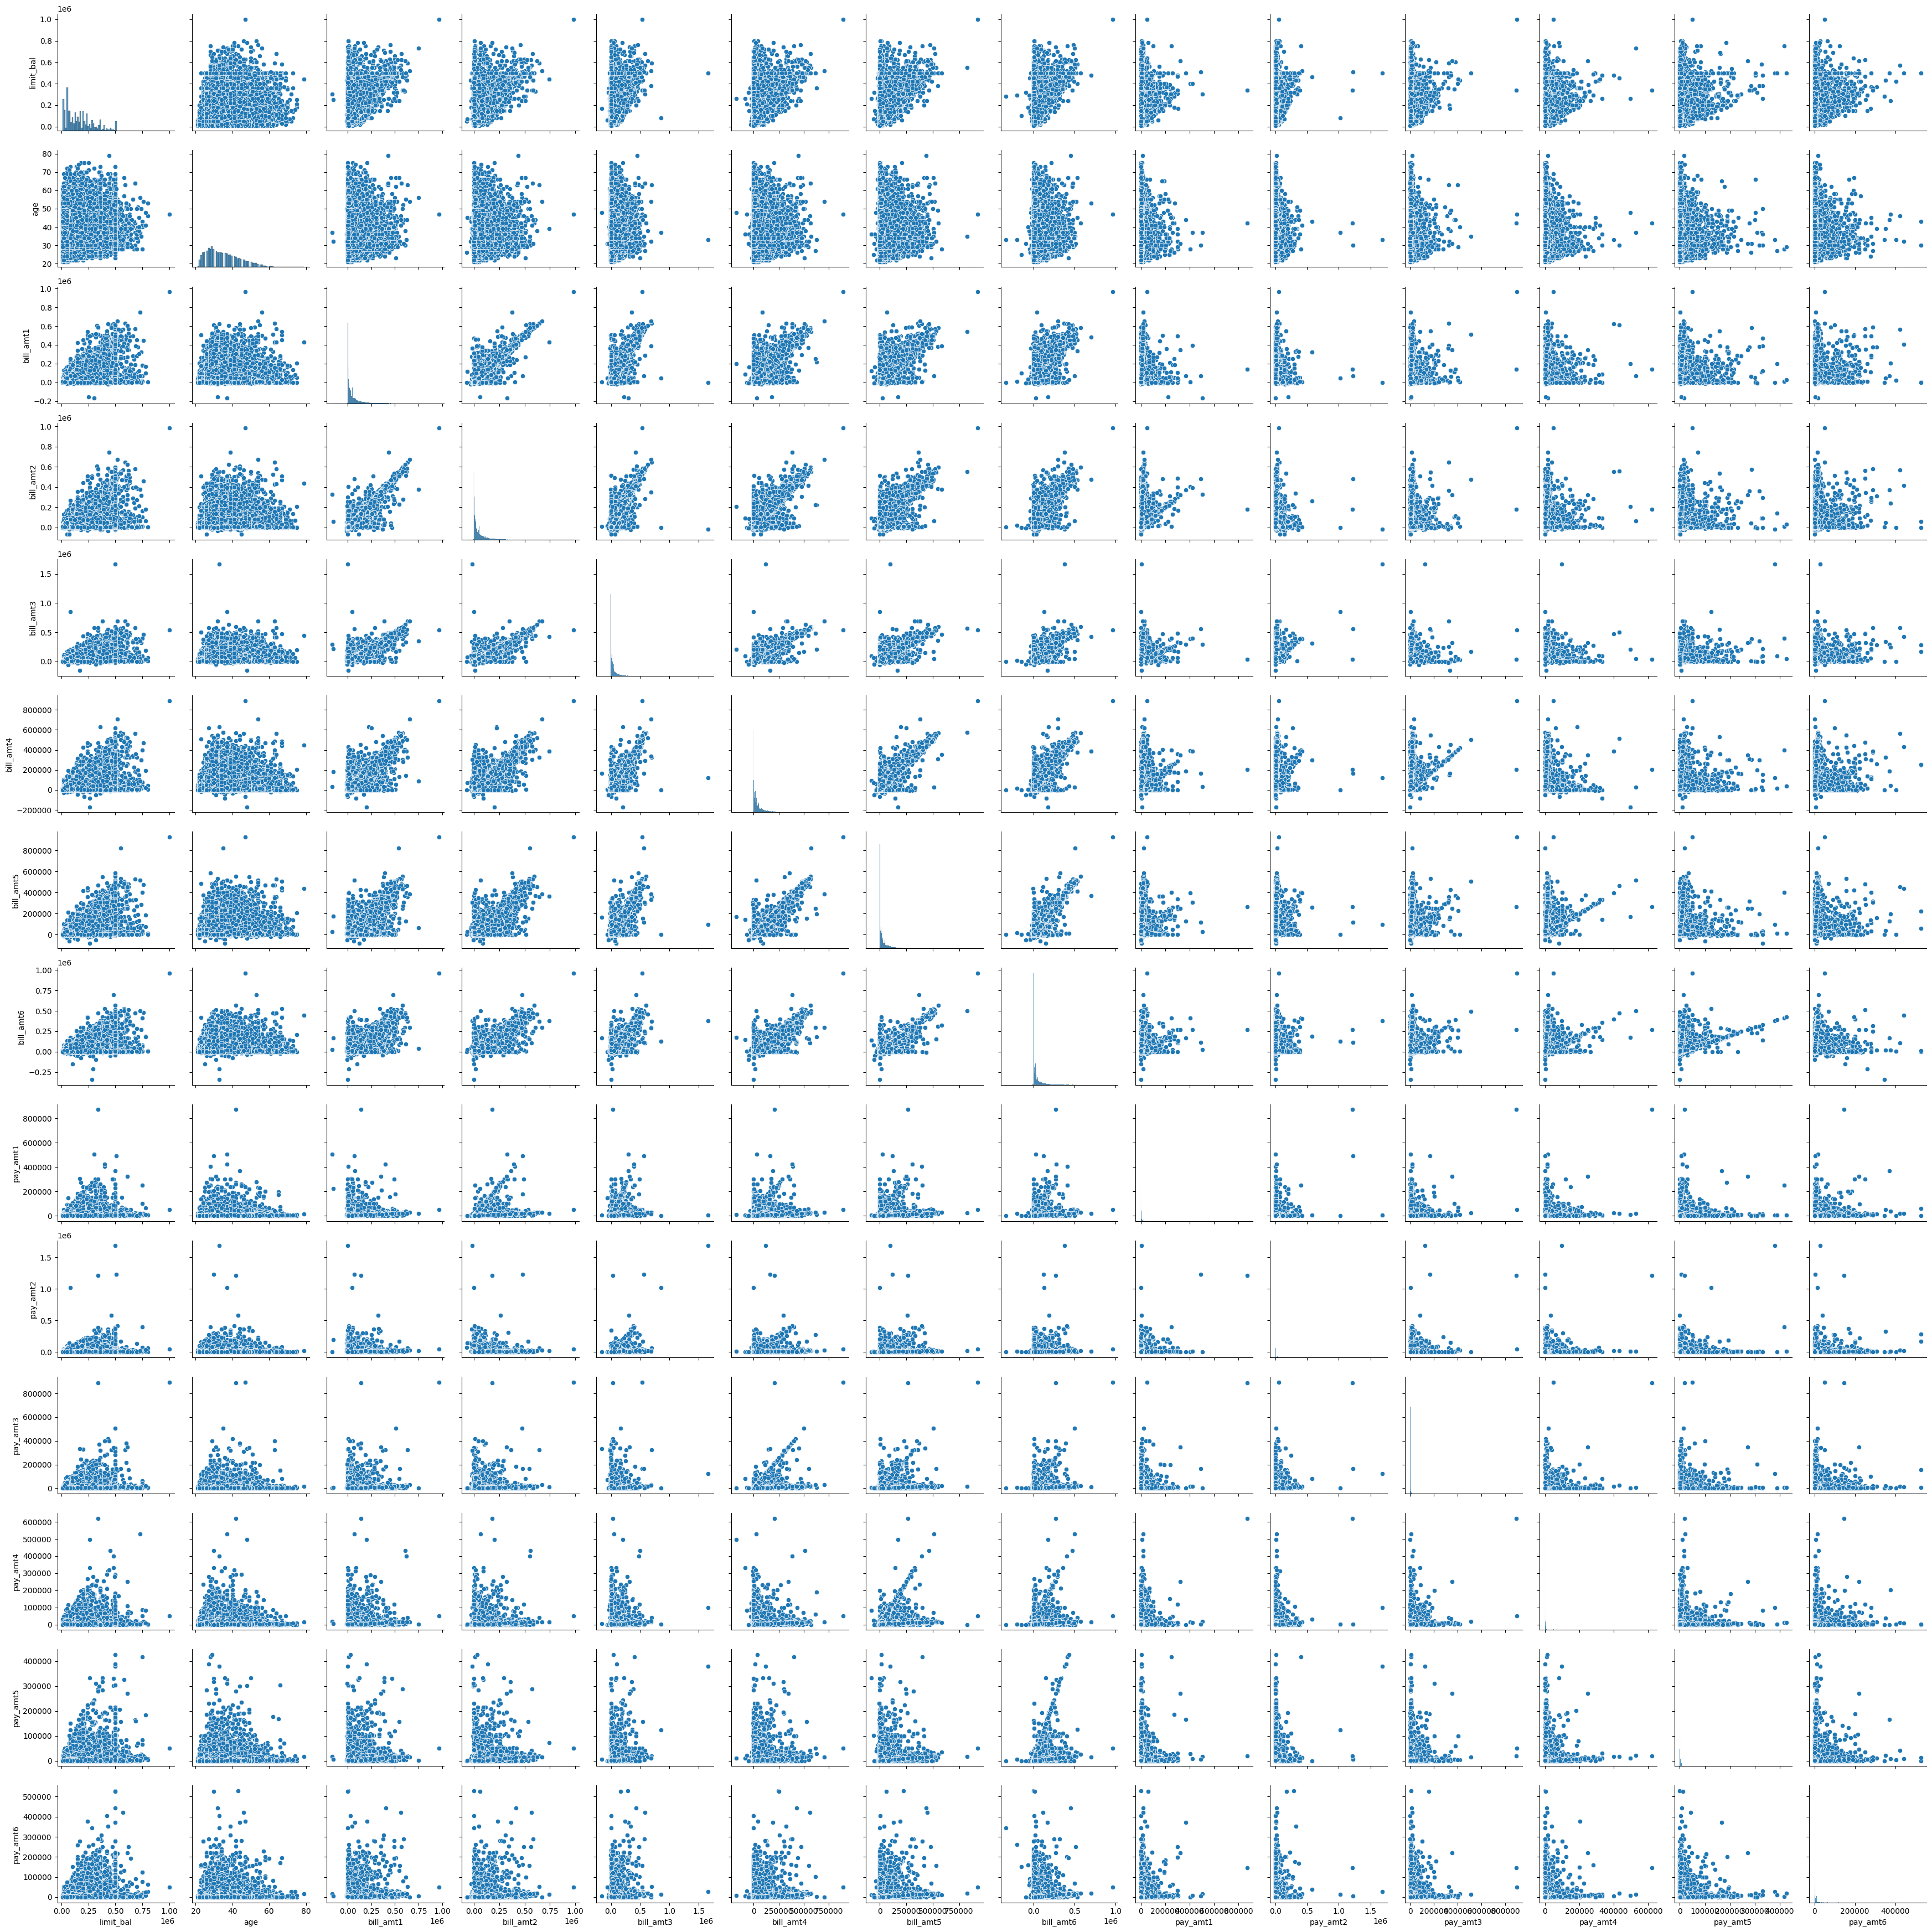

In [27]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [28]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [29]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [30]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: Effect of Credit Limit on Default Rate<br>
Hypothesis 2: Impact of Gender on Default Rate<br>
Hypothesis 3: Impact of Age on Default Probability<br>

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant relationship between the credit limit and the likelihood of default.<br>
Alternate Hypothesis (H1): Higher credit limits are associated with a lower default rate.<br>

#### 2. Perform an appropriate statistical test.

In [31]:
# Split the data into two groups based on default status
defaulted = df[df['default'] == "Y"]
not_defaulted = df[df['default'] == "N"]

# Perform the t-test
t_stat, p_value = stats.ttest_ind(defaulted['limit_bal'], not_defaulted['limit_bal'])

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship credit limit and likelihood of default.")

Reject the null hypothesis. There is a significant relationship.


##### Which statistical test have you done to obtain P-Value?

Two-Sample t-test

##### Why did you choose the specific statistical test?

The two-sample t-test is appropriate for comparing the means of two independent groups, in this case, the group of clients who defaulted and the group of clients who did not default.



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant association between gender and the probability of defaulting.<br>
Alternate Hypothesis (H1): The default rate differs significantly between male and female clients.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
contingency_table = pd.crosstab(df['sex'], df['default'])

chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

if p_val < 0.05:
    print("Reject the null hypothesis. There is a significant association between gender and default rate.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between gender and default rate.")

Reject the null hypothesis. There is a significant association between gender and default rate.


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

Chi-Square Test of Independence is specifically designed to assess the independence of two categorical variables, making it suitable for analyzing the association between gender (a categorical variable) and the probability of defaulting (another categorical variable) in the dataset.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant relationship between the age of the client and the probability of defaulting.<br>
Alternate Hypothesis (H1): Different age groups have varying default rates.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

age_data = df['age']
default_data = df['default'].map({"Y": 1, "N": 0})

# Perform the point-biserial correlation test
corr_coeff, p_value = stats.pointbiserialr(default_data, age_data)

# Check the p-value
if p_value < 0.05:  # You can choose a different significance level
    print("Reject the null hypothesis. There is a significant relationship between age and default probability.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between age and default probability.")

Reject the null hypothesis. There is a significant relationship between age and default probability.


##### Which statistical test have you done to obtain P-Value?

Point-Biserial Correlation Coefficient Test

##### Why did you choose the specific statistical test?

The point-biserial correlation test is specifically designed to assess the relationship between a binary variable and a continuous variable. In this case, it is used to determine whether there is a significant relationship between the age of the clients and their probability of defaulting. By using this test, we can evaluate the strength and significance of the association between age and the likelihood of default in the dataset.

## ***6. Feature Engineering & Data Pre-processing***

In [34]:
#spliting the dataset in dependent and target variable

X= df_model.drop(columns= ["default"])
y= df_model["default"]

### 2. Handling Outliers & Scaling Numerical Columns

In [35]:
def outlier_treatment(col):
    '''
    iqr based outlier treatment
    '''
    
    q1= np.percentile(col, 25, axis= 0)
    q3= np.percentile(col, 75, axis= 0)

    iqr= q3- q1
    
    lower_bound= q1- 1.5*iqr
    upper_bound=  q3+ 1.5*iqr
    
    return np.select(
        (col< lower_bound, col> upper_bound),
        (lower_bound, upper_bound),
        col
    )

In [36]:
num_cols_index= [i for i, feature in enumerate(X.columns) if feature in numerical_cols]
num_cols_index

[0, 4, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [37]:
# with_centering= False, with_scaling= False, quantile_range= (0.5, 0.95), unit_variance= True
num_cols_preprocessing= Pipeline([
    (
        "scaling", 
        PowerTransformer()
    ),
    (
        "outlier treatment",
        FunctionTransformer(outlier_treatment)
    ),
])

In [38]:
X_num_scaled= num_cols_preprocessing.fit_transform(X[numerical_cols])
X_num_scaled_df= pd.DataFrame(X_num_scaled, columns= numerical_cols)
# X_num_scaled_df.columns= numerical_cols

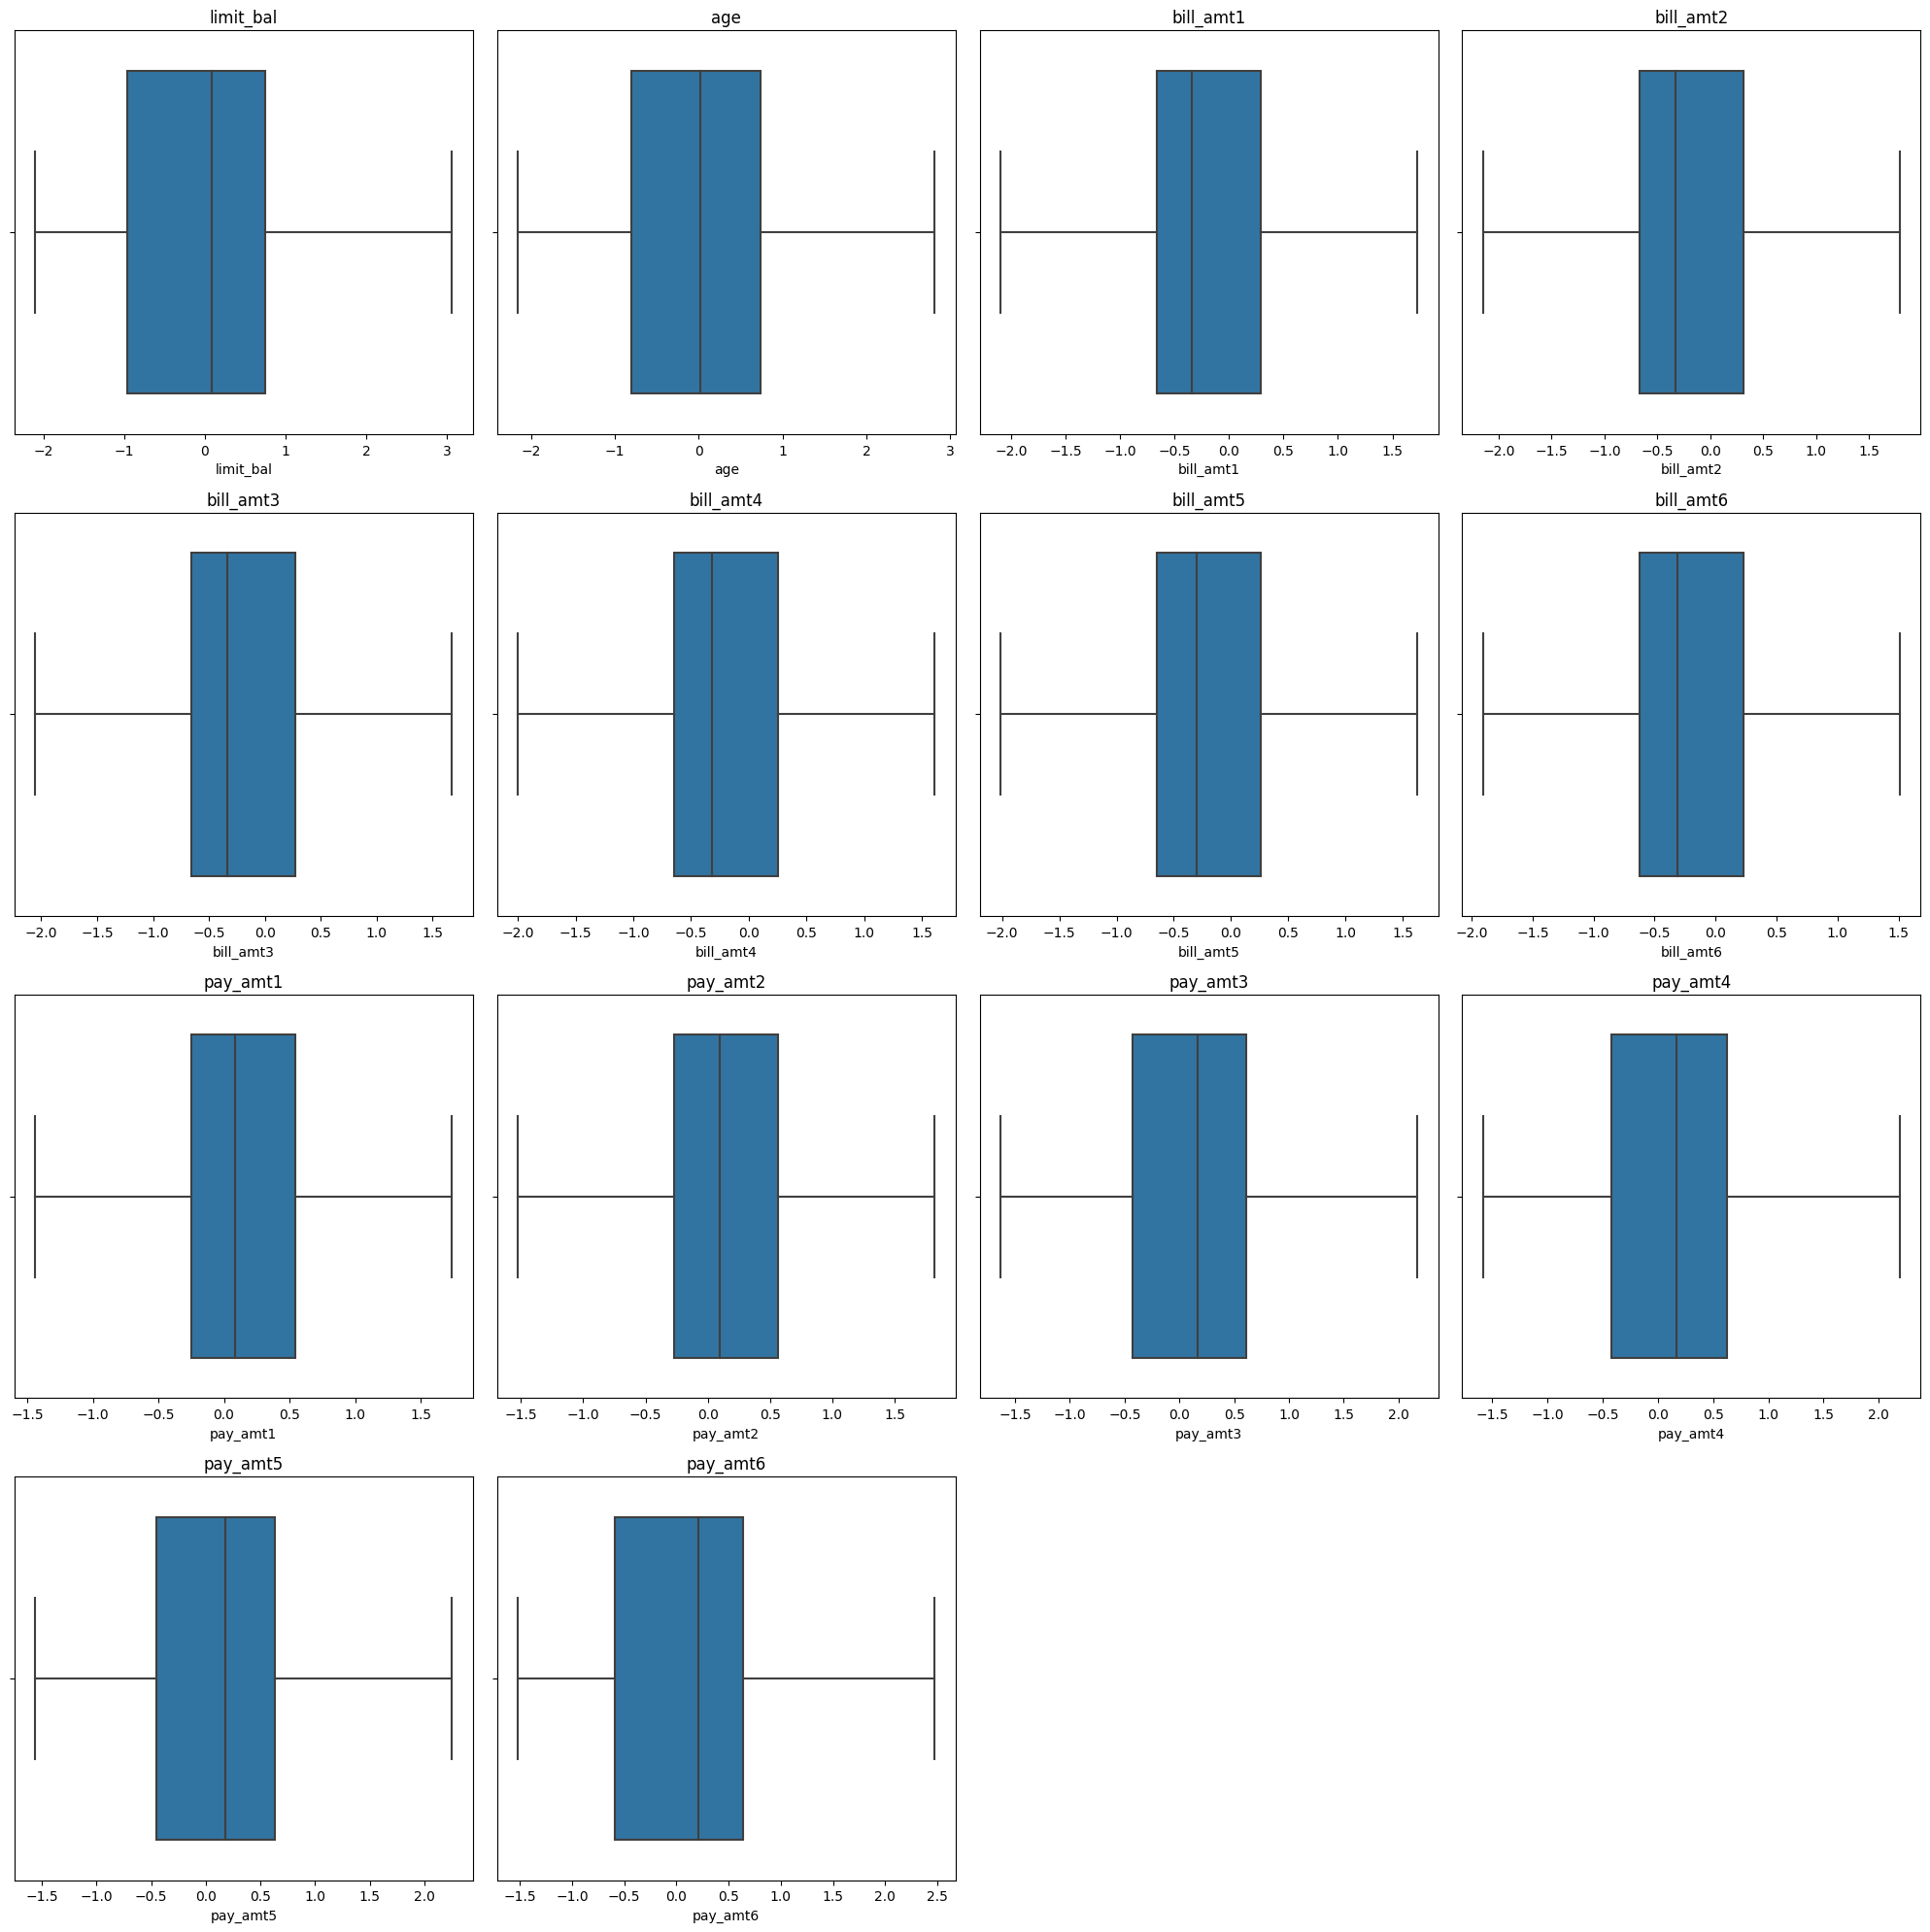

In [39]:
fig, axes= plt.subplots(4, 4, figsize= (20, 20))
axes= axes.flatten()

for i, feature in enumerate(numerical_cols):
    sns.boxplot(data= X_num_scaled_df, x= feature, ax= axes[i])
    axes[i].set_title(feature)

for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

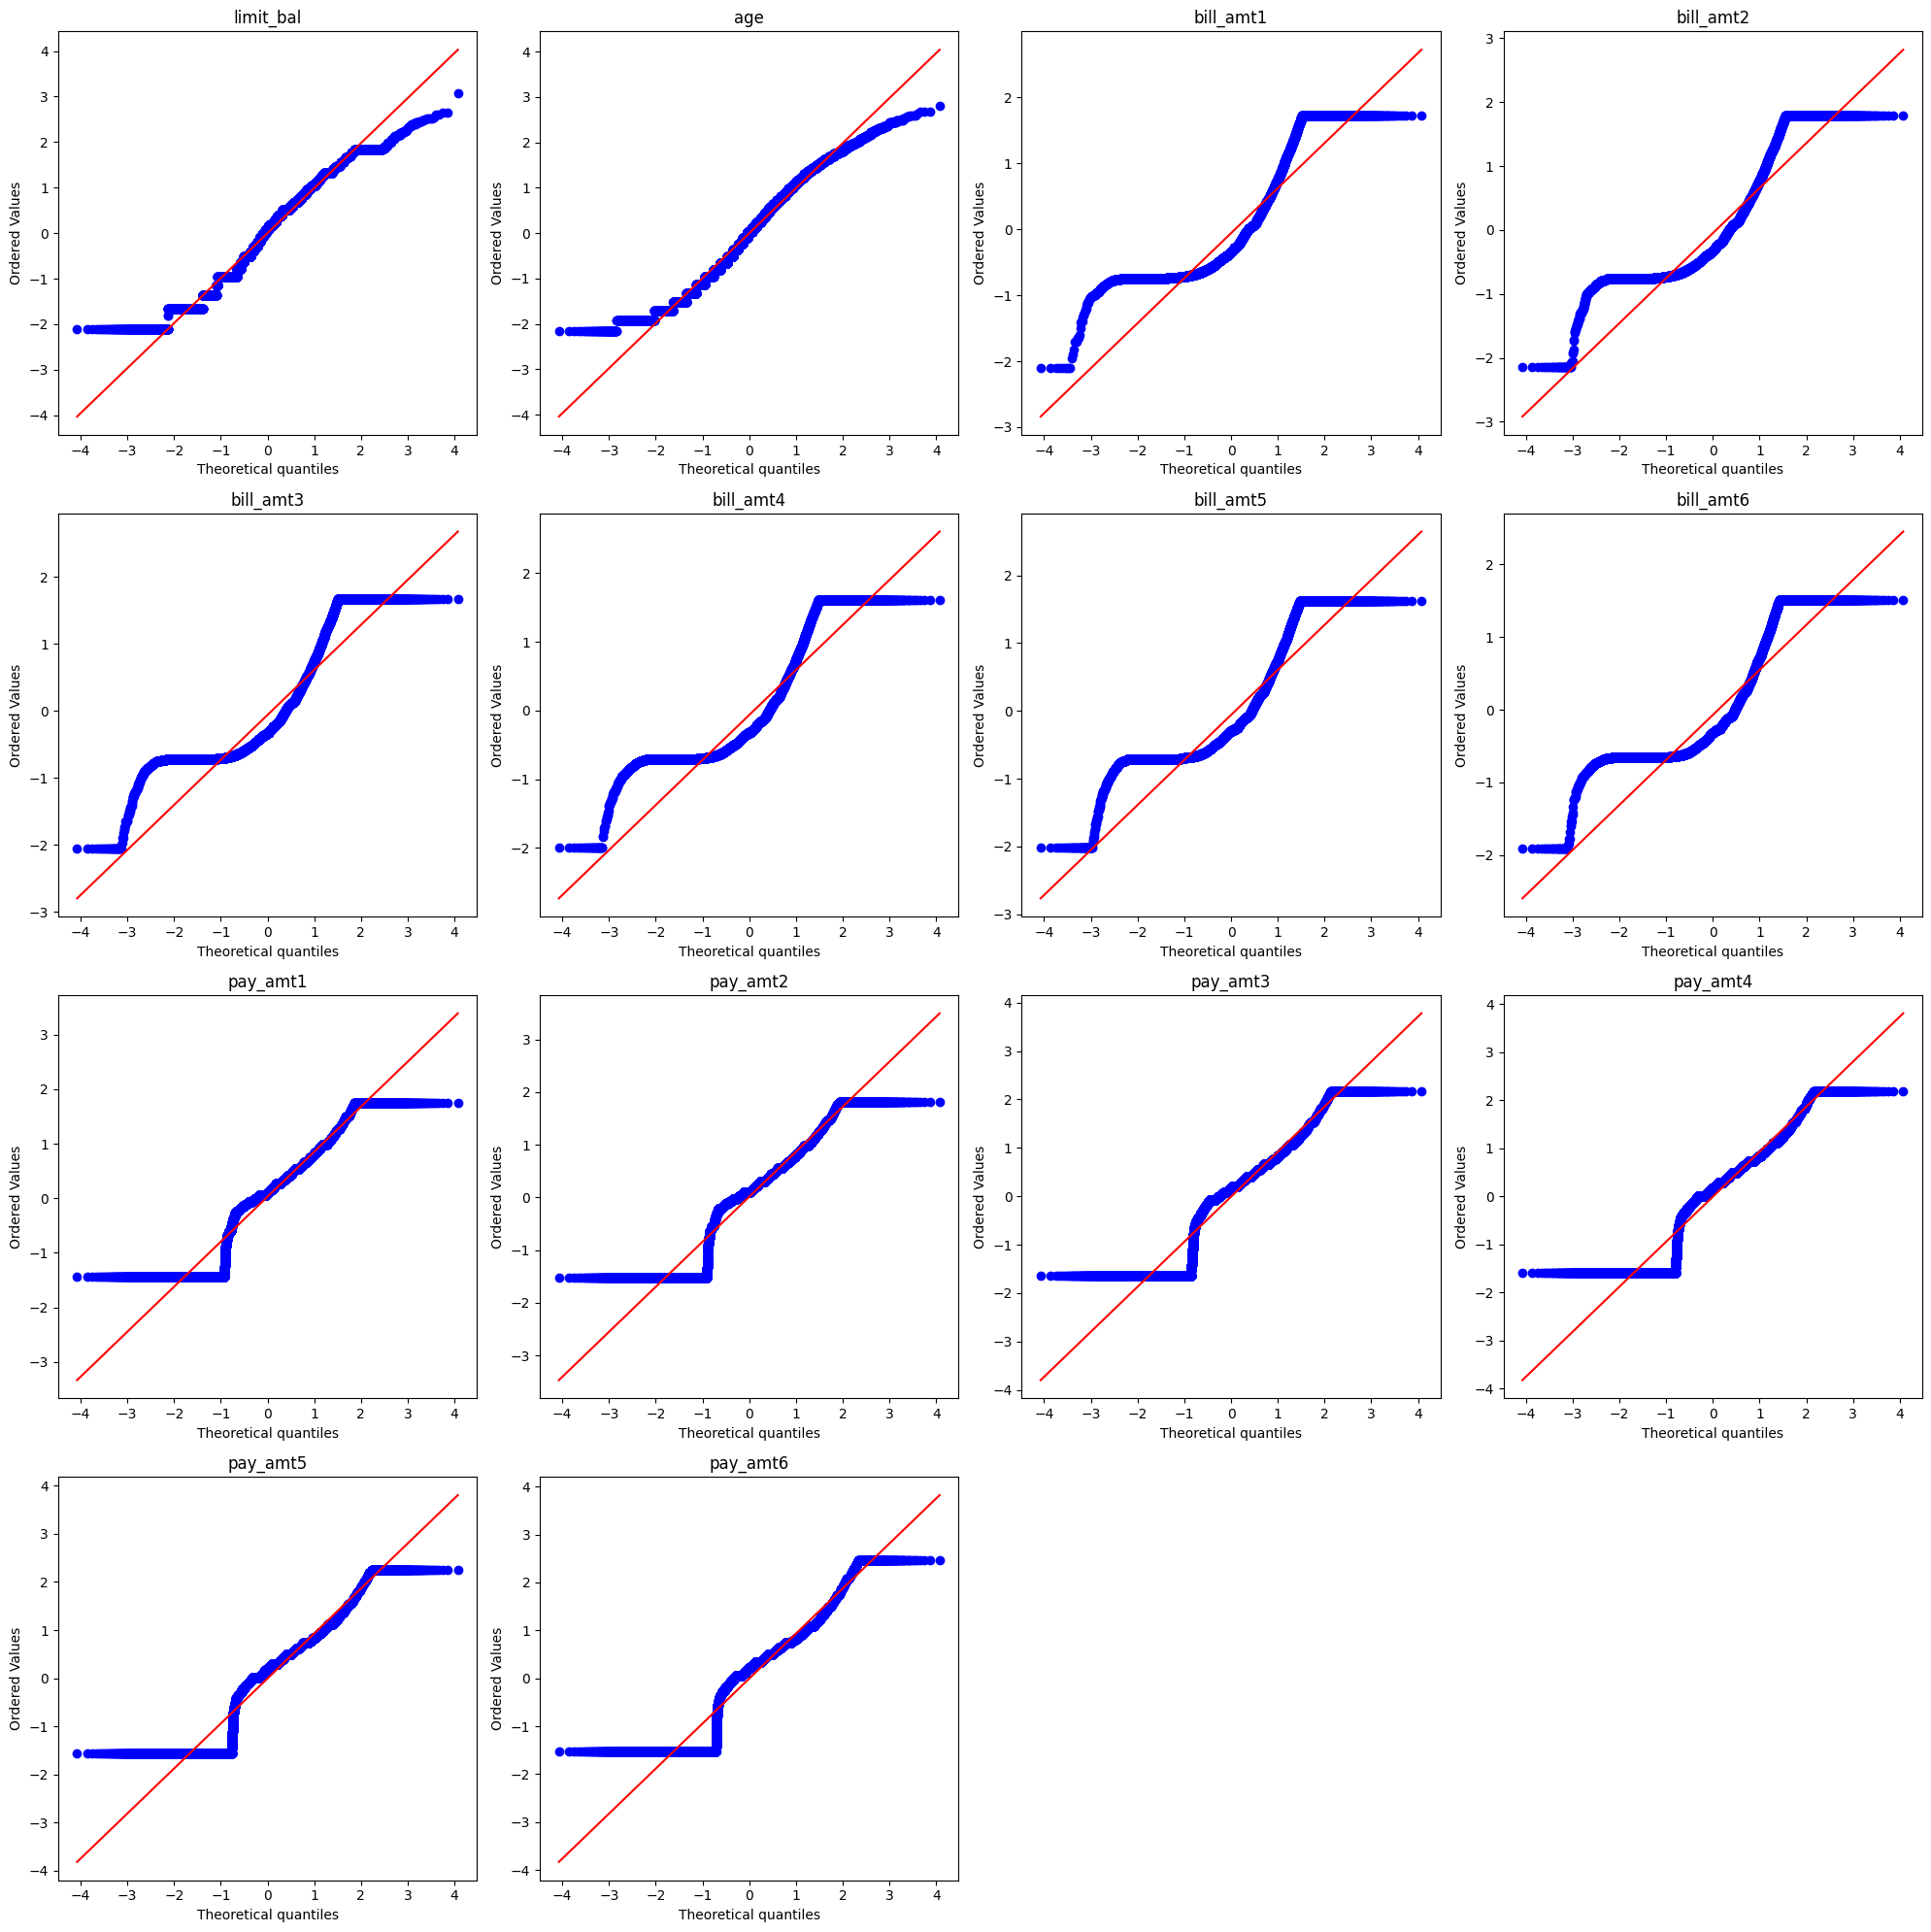

In [41]:
fig, axes= plt.subplots(4, 4, figsize= (20, 20))
axes= axes.flatten()

for i, feature in enumerate(numerical_cols):
    stats.probplot(X_num_scaled_df[feature], plot= axes[i])
    axes[i].set_title(feature)

for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

For Outlier Treatment, i've used the IQR method. The reason for using the IQR method is its robustness in handling skewed distributions and its ability to effectively identify and remove extreme values that can skew the analysis or modeling results.

##### Which method have you used to scale you data and why?

For Scaling the numerical colums, i used PowerTransformer, because it is effective in handling skewed data distributions by applying power transformations that can make the data distribution more symmetrical. It also helps in reducing the impact of outliers and makes the data more suitable for models that assume normally distributed data.

### 3. Categorical Encoding

In [42]:
cat_sex_encoder= OneHotEncoder(
    drop= "first"
    )

cat_education_pipeline= Pipeline([
    (
        "imputing 'Unknown'",
        SimpleImputer(
            missing_values= "Unknown",
            strategy= "most_frequent"
        )
    ),
    (
        "Ordinal Encoding",
        OrdinalEncoder(
            categories= [["0", "Others", "High School", 
                         "Graduate school", "University"]]
        )
    )
])

cat_marriage_pipeline= Pipeline([
    (
        "imputing '0'",
        SimpleImputer(
            missing_values= "0",
            strategy= "most_frequent"
        )
    ),
    (
        "One Hot Encoding",
        OneHotEncoder(
            drop= "first"
        )
    )
])

cat_pay_encoder= OrdinalEncoder(
    categories= [[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]]*6
    )


In [43]:
cat_cols_preprocessing= ColumnTransformer([
    (
        "One Hot Encoding column 'sex'",
        cat_sex_encoder,
        [1]
    ),
    (
        "imputing 'Unknown' with mode and Ordinal Encoding column 'education'",
        cat_education_pipeline,
        [2]
    ),
    (
        "imputing '0' with mode and One Hot Encoding column 'marriage'",
        cat_marriage_pipeline,
        [3]
    ),
    (
        "Ordinal Encoding 'pay_' columns",
        cat_pay_encoder,
        slice(5, 11)
    )
])

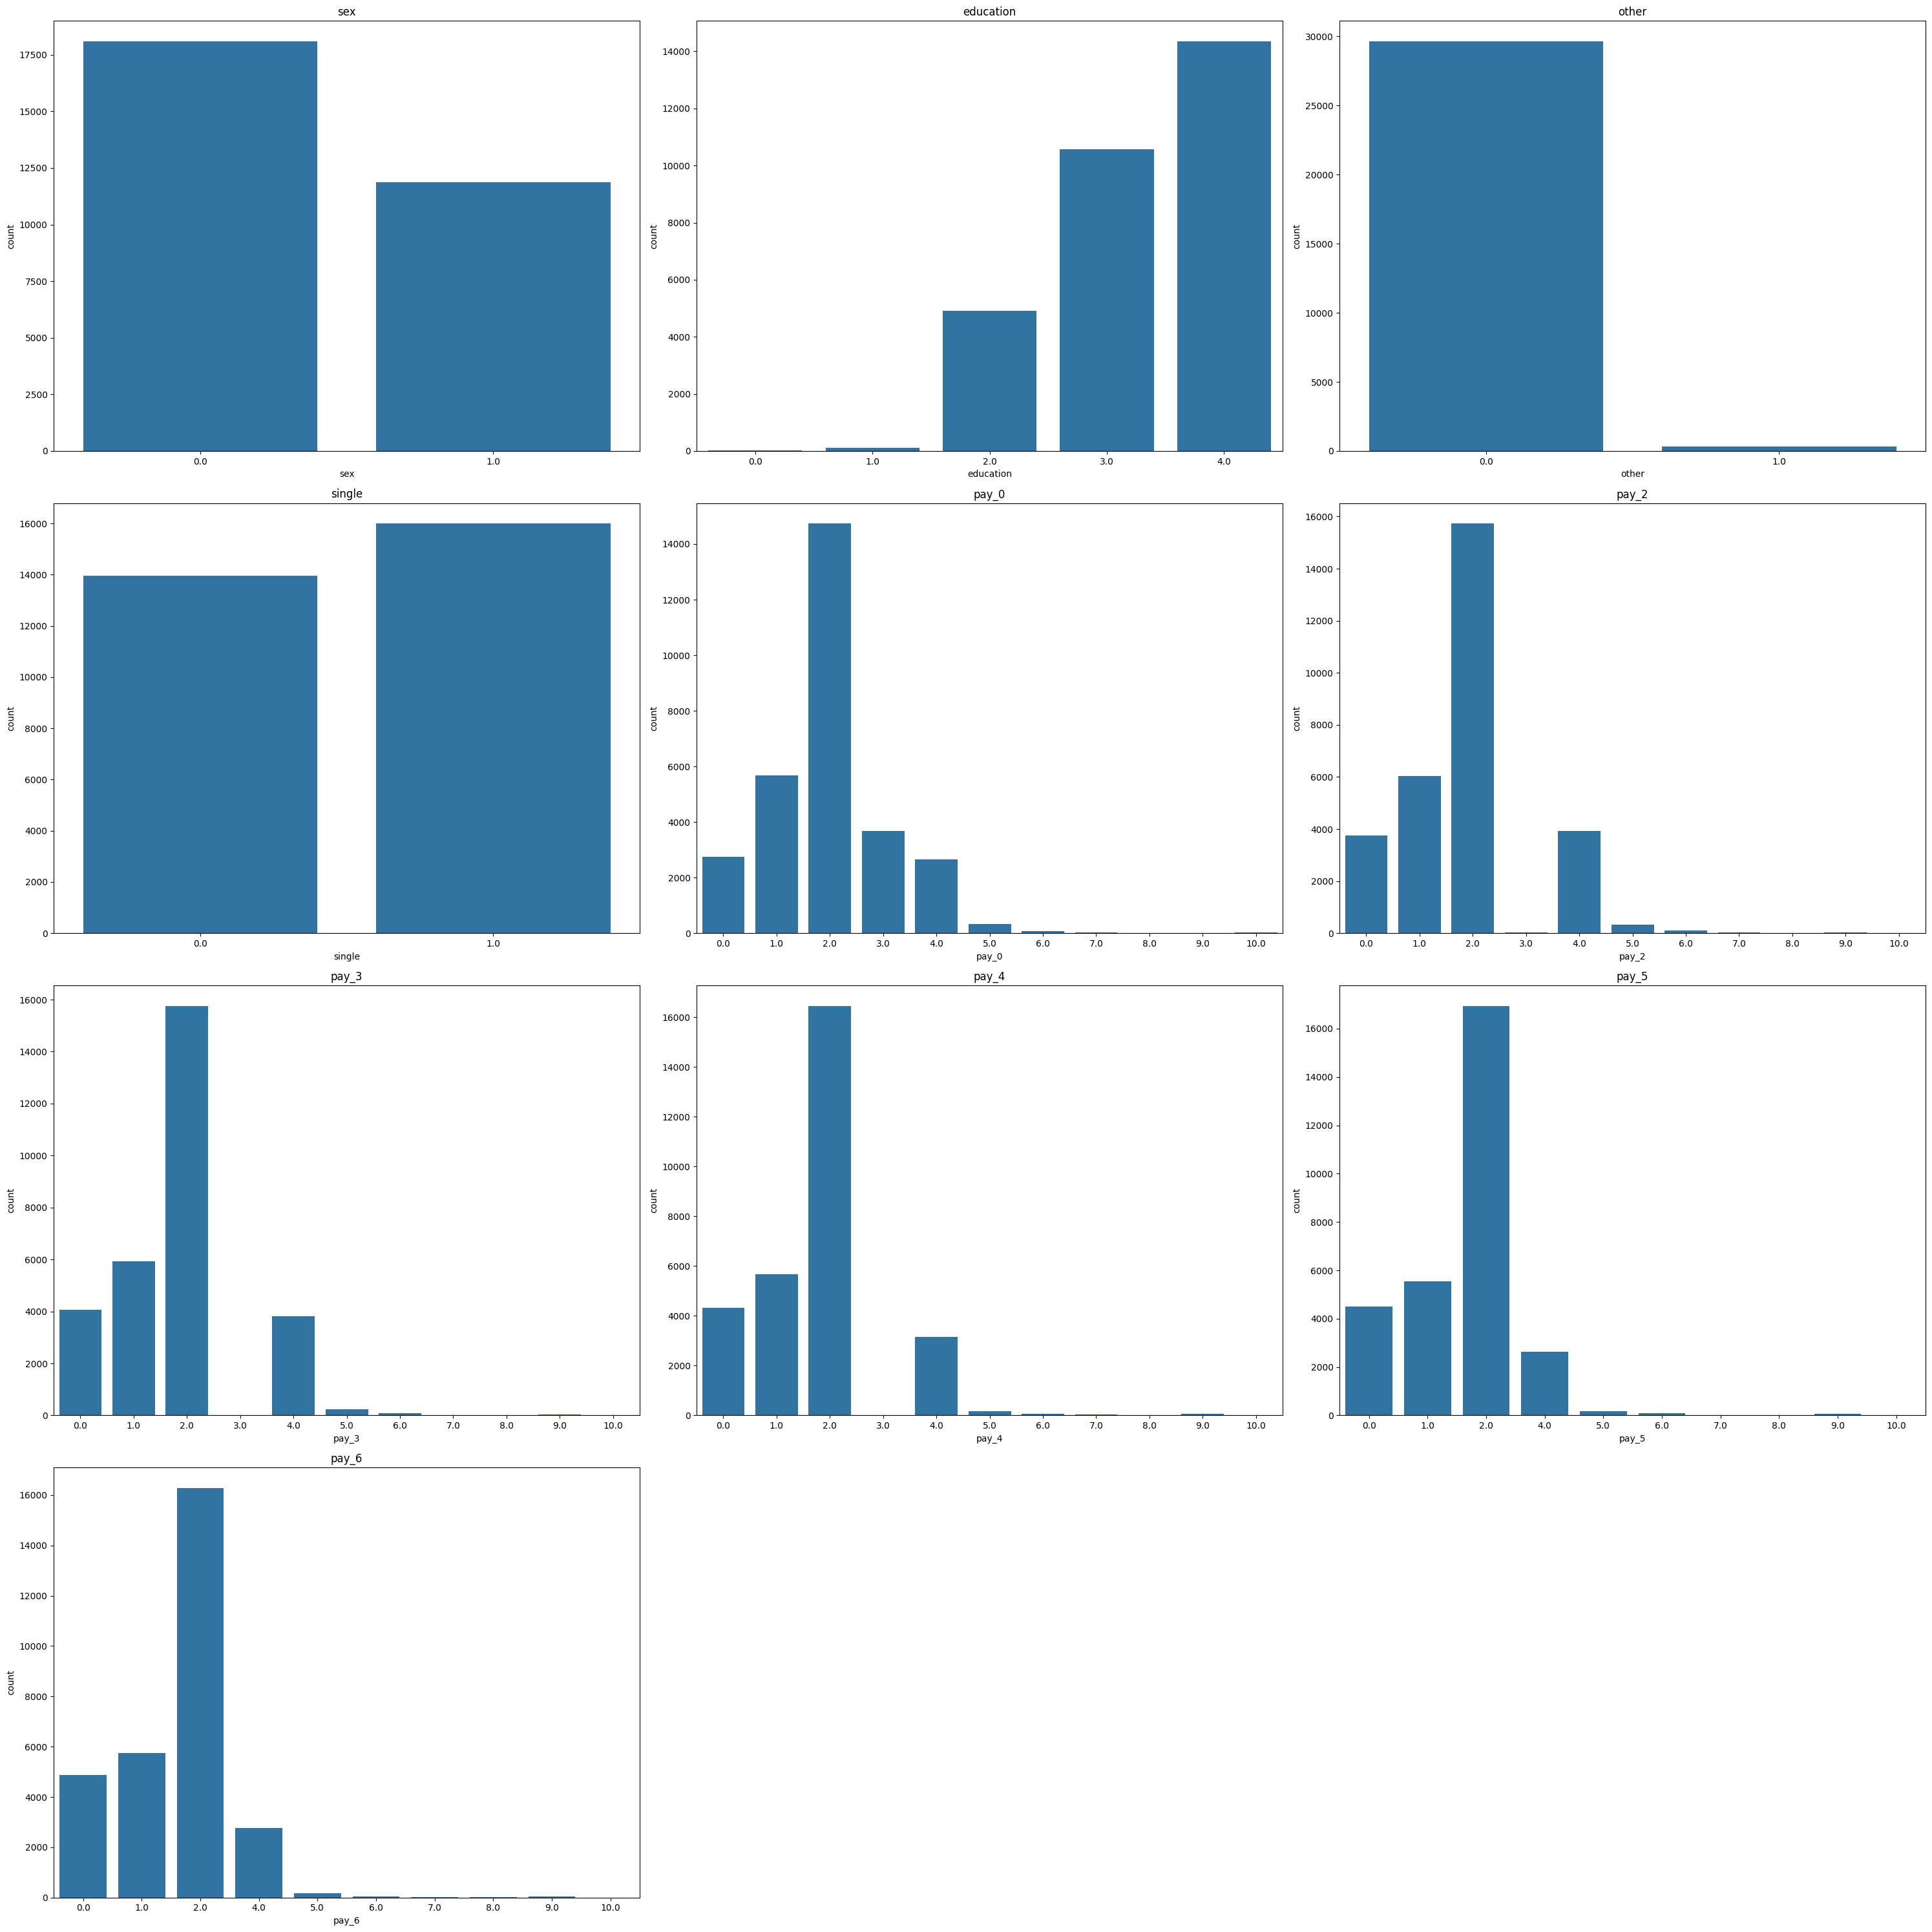

In [44]:
categorical_features= categorical_cols.copy()
categorical_features.remove("default")

fig, axes= plt.subplots(4, 3, figsize= (30, 30))
axes= axes.flatten()

X_cat_processed= cat_cols_preprocessing.fit_transform(X, y)
X_cat_processed_df= pd.DataFrame(X_cat_processed, columns= ["sex", "education", "other", "single", "pay_0", "pay_2", "pay_3", "pay_4", "pay_5", "pay_6"])

for i, feature in enumerate(X_cat_processed_df.columns):
    sns.countplot(data= X_cat_processed_df, x= feature, color= "#1f77b4", ax= axes[i])
    axes[i].set_title(feature)
    
for i in range(X_cat_processed_df.shape[1], 12):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

#### What all categorical encoding techniques have you used & why did you use those techniques?

For the purpose of Categorical Encoding, i've employed 3 encoders- LabelEncoder for the target variable( "default"), OrdinalEncoder for feature "education" and OneHotEncoder for the rest.<br>
>LabelEncoder is a special kind of encoder designed specifically for target variables.<br>
>OrdinalEncoder is utilized when the categorical data has an inherent order or hierarchy. It assigns a numerical value to each category, preserving the ordinal relationship between categories. <br>
>OneHotEncoder is employed when the categorical data has no inherent order or hierarchy, and each category is independent of the others.<br>

### 4. Feature Engineering

In [45]:
feature_engineering= ColumnTransformer([
    (
        "Processing Numerical Columns",
        num_cols_preprocessing,
        num_cols_index
    ),
    (
        "One Hot Encoding column 'sex'",
        cat_sex_encoder,
        [1]
    ),
    (
        "imputing 'Unknown' with mode and Ordinal Encoding column 'education'",
        cat_education_pipeline,
        [2]
    ),
    (
        "imputing '0' with mode and One Hot Encoding column 'marriage'",
        cat_marriage_pipeline,
        [3]
    ),
    (
        "Ordinal Encoding 'pay_' columns",
        cat_pay_encoder,
        slice(5, 11)
    )
])

### 7. Dimesionality Reduction

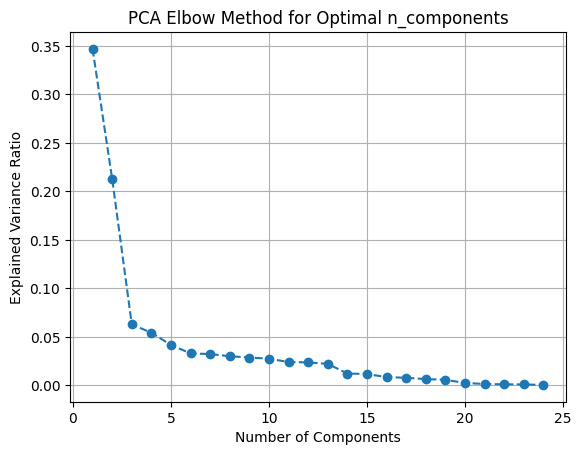

In [46]:
# Initializing PCA
X_processed= feature_engineering.fit_transform(X)
pca = PCA()
pca.fit(X_processed)

# Extracting the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Using the elbow method to find the optimal number of components
num_components = len(explained_variance)
plt.plot(range(1, num_components + 1), explained_variance, marker='o', linestyle='--')
plt.grid(True)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Elbow Method for Optimal n_components')
plt.show()

##### Do you think that dimensionality reduction is needed? Explain Why?

As of now, no dimensionality reduction technique has been implemented on the datasets. But we'll be employing PCA and RFE when building the pipelines. And if it produces any significant improvement in the model, we'll continue to use them.

### 8. Data Splitting

In [47]:
X_train, X_test, y_train, y_test= train_test_split(
    X, y, stratify= y, test_size= 0.30, random_state= 42)

##### What data splitting ratio have you used and why? 

We've split the dataset into 70/30 train/test ratio because this ratio strikes a balance between having sufficient data for model training and having a reasonable amount of data for testing. Also by allocating 70% of the data for training, the model has access to a reasonably large training set, which can help reduce the risk of overfitting. While a 30% test set is often considered statistically significant, meaning that performance metrics (such as accuracy, precision, recall, etc.) estimated on this test set are likely to be representative of the model's performance on new, unseen data.

### 9. Data Transformation

In [48]:
#transforming features
fe= feature_engineering
fe.fit(X_train)
X_train_processed= fe.transform(X_train)
X_test_processed= fe.transform(X_test)
# transforming target variable
le= LabelEncoder()
le.fit(y_train)
y_train_processed= le.transform(y_train)
y_test_processed= le.transform(y_test)

### 9. Handling Imbalanced Dataset

In [49]:
y.value_counts()

default
N    23335
Y     6630
Name: count, dtype: int64

In [50]:
#number of class "Y" instances in target variable
len(y[y=="Y"])/len(y)

0.22125813449023862

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced, as only 22% of all the instances are 'Y', while the rest are'N'

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Rather than using Oversampling or Undersampling to treat the imbalance in the dataset, we'll penalize the models as we build them. The main reason for that being preservation of data integrity as by using class weighting, we can maintain the original distribution of the dataset. This is important when the class imbalance reflects the true distribution of the target variable in the real-world scenario we're modeling.

## ***7. ML Model Implementation***

In [51]:
models= {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "MLP Classifier": MLPClassifier(max_iter= 1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Ridge Classifier": RidgeClassifier(),
}

In [52]:
meta_data_00 = []

for name, model in tqdm(models.items()):
    model_data= {}
    model_data["name"]= name
    model.random_state= 42
    stkfold= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores= cross_validate(
        model, X_train_processed, y_train_processed,
        cv= stkfold, scoring= ["accuracy", "precision_macro", "recall_macro", "f1_macro", "f1_micro"], 
        error_score= "raise"
    )
    
    model_data["average accuracy"]= np.mean(scores["test_accuracy"])
    model_data["average precision"]= np.mean(scores["test_precision_macro"])
    model_data["average recall"]= np.mean(scores["test_recall_macro"])
    model_data["average f1 macro"]= np.mean(scores["test_f1_macro"])
    model_data["average f1 micro"]= np.mean(scores["test_f1_micro"])
    
    meta_data_00.append(model_data)

100%|██████████| 13/13 [04:35<00:00, 21.22s/it]


In [53]:
best_models_df= pd.DataFrame(meta_data_00).sort_values("average f1 micro", ascending= False).reset_index(drop= True)
best_models_df

name  average accuracy  average precision  \
0         Support Vector Classifier          0.817688           0.756854   
1                AdaBoostClassifier          0.816925           0.757753   
2          Random Forest Classifier          0.813492           0.738083   
3                    MLP Classifier          0.808296           0.728414   
4      Linear Discriminant Analysis          0.807437           0.740999   
5               Logistic Regression          0.806341           0.744175   
6                Bagging Classifier          0.802193           0.713674   
7                  Ridge Classifier          0.799380           0.749771   
8                               KNN          0.792563           0.691249   
9              Gaussian Naive Bayes          0.772777           0.671550   
10  Quadratic Discriminant Analysis          0.735304           0.651815   
11         Decision Tree Classifier          0.725912           0.607926   
12            Bernoulli Naive Bayes          0.713611           0.564938   

    average recall  average f1 macro  average f1 micro  
0         0.644398          0.669064          0.817688  
1         0.639823          0.664085          0.816925  
2         0.653118          0.675670          0.813492  
3         0.640221          0.661345          0.808296  
4         0.614526          0.633665          0.807437  
5         0.606264          0.623431          0.806341  
6         0.632521          0.651846          0.802193  
7         0.573411          0.576981          0.799380  
8         0.640529          0.656198          0.792563  
9         0.674023          0.672704          0.772777  
10        0.688911          0.661369          0.735304  
11        0.612156          0.609816          0.725912  
12        0.557446          0.559970          0.713611

In [54]:
print(f"for the purpose of this project, we'll use f1 micro as the metric for scoring our models. According to f1 micro, the top three models are- \n{best_models_df.iloc[0, 0]}\n{best_models_df.iloc[1, 0]}\n{(best_models_df.iloc[2, 0])}")

for the purpose of this project, we'll use f1 micro as the metric for scoring our models. According to f1 micro, the top three models are- 
Support Vector Classifier
AdaBoostClassifier
Random Forest Classifier


In [4]:
cv_kwargs= {
    "scoring": "f1_micro",
    "cv": StratifiedKFold(n_splits= 5, shuffle=True, random_state= 42),
#     "error_score": "raise",
    "n_jobs": -1
}

In [56]:
def crossval_f1_scores(model, round_to= 4):
    """
    Calculate the average F1 score using cross-validation.

    Parameters:
    -----------
    model : object
        The model for which the average F1 score is calculated.

    round_to : int, optional
        Number of decimal places to round the scores. Defaults to 4.

    Returns:
    --------
    str
        A string displaying the mean F1 score along with its standard deviation.

    """    
    scores= cross_val_score(
        model, X_train, y_train_processed,
        **cv_kwargs,
        error_score= "raise"
    )

    return f"mean f1 score: {np.round(np.mean(scores), round_to)} \u00B1 {np.round(np.std(scores), round_to)}"

In [57]:
def model_analysis(model, name, round_to= 4):
    """
    Analyze the performance of the model using F1 score and AUC.

    Parameters:
    -----------
    model : object
        The trained model for analysis.

    name : str
        Name of the model for labeling purposes.

    round_to : int, optional
        Number of decimal places to round the scores. Defaults to 4.

    Returns:
    --------
    dict
        A dictionary containing the model's name, F1 scores for train and test datasets, and AUC for both datasets.

    """
    
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)
    return{
        "model name": name,
        "f1 score(train dataset)": np.round(model.score(X_train, y_train_processed), round_to),
        "f1 score(test dataset)": np.round(model.score(X_test, y_test_processed), round_to),
        "auc (train dataset)": np.round(roc_auc_score(y_train_processed, y_train_pred), round_to),
        "auc (test dataset)": np.round(roc_auc_score(y_test_processed, y_test_pred), round_to)
    }

In [58]:
def viz_pr_roc(model, name):
    """
    Visualize Precision-Recall and ROC Curves.

    Parameters:
    -----------
    model : object
        The predictive model for which to visualize the curves.

    name : str
        Name of the model for labeling purposes.

    Note:
    -----
    This function generates subplots of Precision-Recall and ROC curves for the train and test datasets.
    """
    
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)

    fig, axes= plt.subplots(2, 2, figsize= (10, 10))
    axes= axes.flatten()

    PrecisionRecallDisplay.from_predictions(
        y_train_pred, y_train_processed,
        name= name,
#         plot_chance_level= True,
        ax= axes[0]
    )
    axes[0].set_title("Precision-Recall Display (Train Dataset)")
    
    PrecisionRecallDisplay.from_predictions(
        y_test_pred, y_test_processed,
        name= name,
#         plot_chance_level= True,
        ax= axes[1]
    )
    axes[1].set_title("Precision-Recall Display (Test Dataset)")
    
    
    RocCurveDisplay.from_predictions(
        y_train_pred, y_train_processed,
        name= name,
#         plot_chance_level= True,
        ax= axes[2]
    )
    axes[2].set_title("ROC Curve (Train Dataset)")

    RocCurveDisplay.from_predictions(
        y_test_pred, y_test_processed,
        name= name,
#         plot_chance_level= True,
        ax= axes[3]
    )
    axes[3].set_title("ROC Curve (Test Dataset)")
    plt.show()

In [5]:
def find_best_estimator(pipeline, param_grid, n_iter= 50, verbose= False):
    """
    Find the best estimator for a given pipeline and parameter grid using BayesSearchCV.

    Parameters:
    -----------
    pipeline : object
        The pipeline to be used for the search.

    param_grid : dict
        The parameter grid specifying the hyperparameter space to search over.

    verbose : bool, optional
        Whether to output detailed logs during the search. Defaults to False.

    Returns:
    --------
    object
        The best estimator found using BayesSearchCV.
    """
    
    pip= clone(pipeline)
    cv= BayesSearchCV(
        pip, 
        search_spaces= param_grid,
        **cv_kwargs,
        n_iter= n_iter,
        verbose= verbose,
        refit= True
    )
    #fitting
    cv.fit(X_train, y_train_processed)
    
    best_estimator= clone(cv.best_estimator_)
    
    return best_estimator

In [59]:
def pipeline_w_rfe(pipeline, on_step= 1):
    """
    Integrates Recursive Feature Elimination (RFE) into the pipeline.

    Parameters:
    -----------
    pipeline : object
        The pipeline to be enhanced with RFE-based feature selection.

    on_step : int, optional
        The index indicating the step at which the feature selection should be inserted. Defaults to 1.

    Returns:
    --------
    object
        A pipeline object with RFE-based feature selection integrated.

    """
    
    pip= clone(pipeline)
    model= pip.named_steps["model"]
    rfecv= RFECV(
        estimator= model,
        step= 1, 
        **cv_kwargs
    )

    rfecv.fit(X_train_processed, y_train_processed)

    mask= rfecv.support_
    pip.steps.insert(on_step, (
        "feature_selection",
        ColumnTransformer([
            (
                "RFE based feature selection",
                "passthrough",
                mask
            )
    ],
        remainder= "drop"
    )
    ))
    
    return pip

In [60]:
def pipeline_w_pca(pipeline, on_step= 1):
    """
    Enhance the pipeline with PCA-based feature extraction.

    Parameters:
    -----------
    pipeline : object
        The pipeline to be enhanced with PCA-based feature extraction.

    on_step : int, optional
        The index indicating the step at which the feature extraction should be inserted. Defaults to 1.

    Returns:
    --------
    object
        A pipeline object with PCA-based feature extraction integrated.

    Note:
    -----
    This function adds Principal Component Analysis (PCA) based feature extraction to the provided pipeline.

    """
    pip= clone(pipeline)
    pip.steps.insert(on_step, (
        "feature_extraction",
        PCA(n_components= 3)
    ))
    
    return pip

### ML Model - 1

> #### Support Vector Classifier

In [6]:
# ML Model - 1 Implementation

svc_pipeline= Pipeline([
    (
        "feature_engineering",
        feature_engineering
    ),
    (
        "model",
        SVC()
    )
])

print(crossval_f1_scores(svc_pipeline))

NameError: name 'feature_engineering' is not defined

In [7]:
# Fit the Algorithm
svc_pipeline.fit(X_train, y_train_processed)

NameError: name 'svc_pipeline' is not defined

In [8]:
ma_svc= model_analysis(svc_pipeline, name= "svc")
ma_svc

NameError: name 'model_analysis' is not defined

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

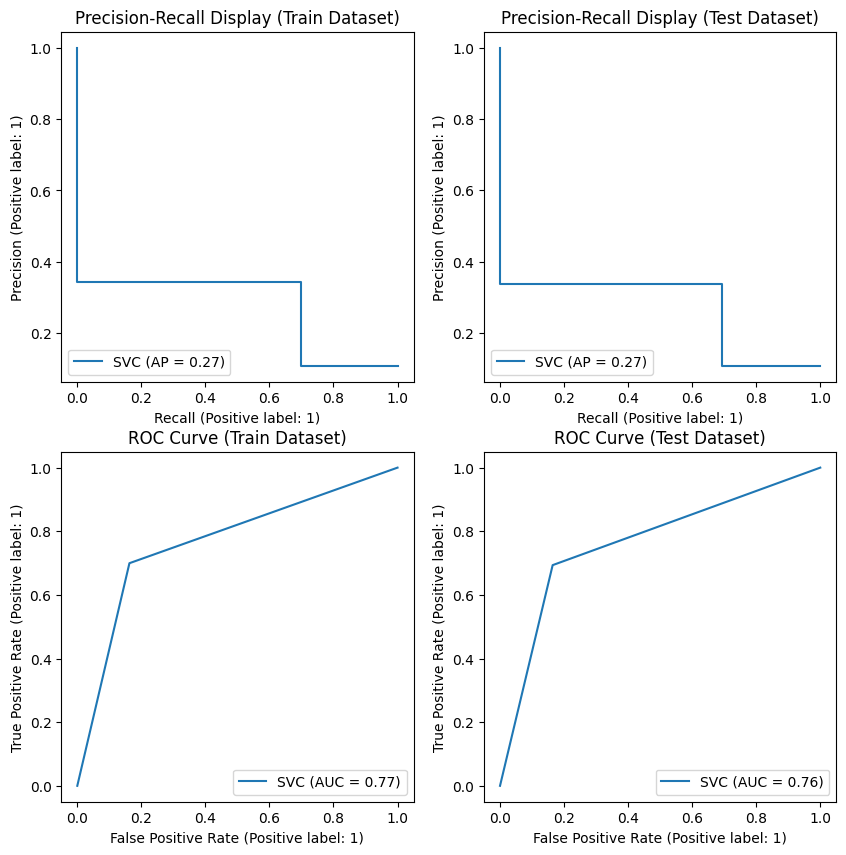

In [64]:
viz_pr_roc(svc_pipeline, name= "SVC")

#### 2. Cross- Validation & Hyperparameter Tuning

In [3]:
svc_params= [
    (
        {
            "model__C": Integer(1, 200, prior= "log-uniform"),
            "model__kernel": Categorical(["linear", "rbf",]),
        }, 50
    ),
    (
        {
            "model__C": Integer(1, 200, prior= "log-uniform"),
            "model__kernel": Categorical(["poly",]),
            "model__degree": Integer(1, 4)
        }, 50
    )
]
best_svc= find_best_estimator(svc_pipeline, svc_params, verbose= True)

print(crossval_f1_scores(best_svc))

NameError: name 'find_best_estimator' is not defined

In [ ]:
best_svc.fit(X_train, y_train_processed)

In [ ]:
ma_b_svc= model_analysis(best_svc, name= "best svc")
ma_b_svc

In [ ]:
best_svc_w_pca= pipeline_w_pca(best_svc)
print(avg_f1_score(best_svc_w_pca))

In [ ]:
ma_b_svc_w_pca= model_analysis(model= best_svc_pipeline, name= "best svc")
ma_b_svc_w_pca

In [ ]:
viz_pr_roc(model= best_svc_pipeline, name= "best svc")

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [23]:
ada_pipeline= Pipeline([
    (
        "feature_engineering",
        feature_engineering
    ),
    (
        "model",
        AdaBoostClassifier(),
    )
])

print(crossval_f1_scores(ada_pipeline))

mean f1 score: 0.818


In [24]:
#fitting
ada_pipeline.fit(X_train, y_train_processed)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7b24643cfeb0>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  Pipeline(steps=[('One Hot '
                                                                   'Encod...
                                                                   OneHotEncoder(drop='first'))]),
                                                  [3]),
                                                 ("Ordinal Encoding 'pay_' "
                                                  'columns',
                                                  Pipeline(steps=[('Ordinal '
                                                                   'Encoding '
                                                                   'columns '
                                                                   "'pay_'",
                                                                   OrdinalEncoder(categories=[[-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                          

In [25]:
ma_ada= model_analysis(model= ada_pipeline, name= "ada")
ma_ada

{'model name': 'ada',
 'f1 score(train dataset)': 0.819,
 'f1 score(test dataset)': 0.814}

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

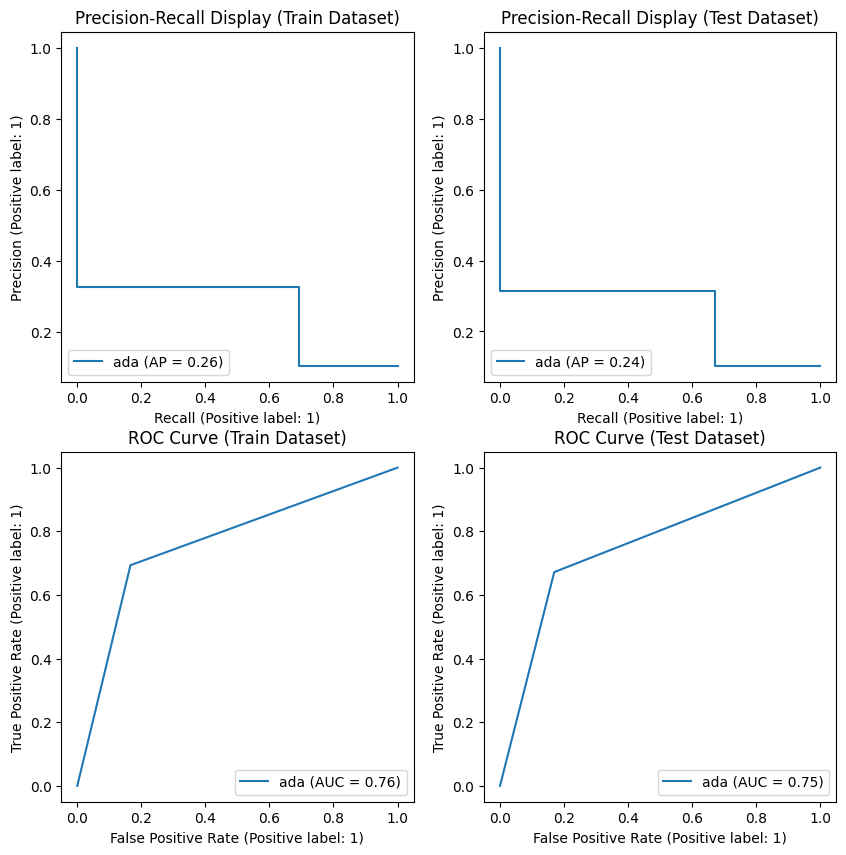

In [26]:
# Visualizing evaluation Metric Score chart
viz_pr_roc(model= ada_pipeline, name= "ada")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
ada_params= {
    "model__estimator": Categorical([DecisionTreeClassifier(), SVC(probability=True), GaussianNB(), LogisticRegression()]),
    "model__n_estimators": Integer(50, 200, prior= "log-uniform"),
    "model__learning_rate": Real(0.1, 1.0, prior= "log-uniform"),
    "model__algorithm": Categorical(['SAMME', 'SAMME.R'])
}
best_ada= find_best_estimator(ada_pipeline, param_grid= ada_params)

print(crossval_f1_scores(best_ada))

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ada_cv= BayesSearchCV(
    ada_pipeline,
    search_spaces= {
        "model__estimator": Categorical([DecisionTreeClassifier(), SVC(probability=True), GaussianNB(), LogisticRegression()]),
        "model__n_estimators": Integer(50, 200, prior= "log-uniform"),
        "model__learning_rate": Real(0.1, 1.0, prior= "log-uniform"),
        "model__algorithm": Categorical(['SAMME', 'SAMME.R'])
    },
    scoring= "f1_micro",
    cv= StratifiedKFold(shuffle= True, random_state= 42),
    error_score= "raise", n_jobs= -1,
    verbose= 1
)
# Fit the Algorithm
ada_cv.fit(X_train, y_train_processed)
# Predict on the model

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
best_ada= clone(ada_cv.best_estimator_)
print(crossval_f1_scores(best_ada))

In [ ]:
best_ada.fit(X_train, y_train_processed)

In [ ]:
ma_b_ada= model_analysis(best_ada,name= "best ada")
ma_b_ada

In [ ]:
best_ada_w_rfe= pipeline_w_rfe(best_ada)
print(crossval_f1_scores(best_ada_w_rfe))

In [ ]:
best_ada_w_rfe.fit(X_train, y_train_processed)

In [ ]:
ma_b_ada_w_rfe= model_analysis(best_ada_w_rfe, name= "best ada w/ rfe")
ma_b_ada_w_rfe

In [ ]:
best_ada_w_pca= pipeline_w_pca(best_ada)
print(crossval_f1_scores(best_ada_w_pca))

In [ ]:
best_ada_w_pca.fit(X_train, y_train_processed)

In [ ]:
ma_b_ada_w_pca= model_analysis(best_ada_w_pca)
ma_ba_ada_w_pca

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

> #### Random Forest Classifier

In [11]:
# ML Model - 3 Implementation

rf_pipeline= Pipeline([
    (
        "feature engineering",
        feature_engineering
    ),
    (
        "model",
        RandomForestClassifier()
    )
])

print(crossval_f1_scores(rf_pipeline))

mean f1 score: 0.818


In [12]:
# Fit the Algorithm
rf_pipeline.fit(X_train, y_train_processed)

Pipeline(steps=[('feature engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7f1f8c9cbeb0>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  Pipeline(steps=[('One Hot '
                                                                   'Encodi...
                                                                   OneHotEncoder(drop='first'))]),
                                                  [3]),
                                                 ("Ordinal Encoding 'pay_' "
                                                  'columns',
                                                  Pipeline(steps=[('Ordinal '
                                                                   'Encoding '
                                                                   'columns '
                                                                   "'pay_'",
                                                                   OrdinalEncoder(categories=[[-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                         

In [18]:
ma_rf= model_analysis(model= rf_pipeline, name= "rf")
ma_rf

{'model name': 'rf',
 'f1 score(train dataset)': 0.999,
 'f1 score(test dataset)': 0.815,
 'auc (train dataset)': 0.999,
 'auc (test dataset)': 0.655}

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

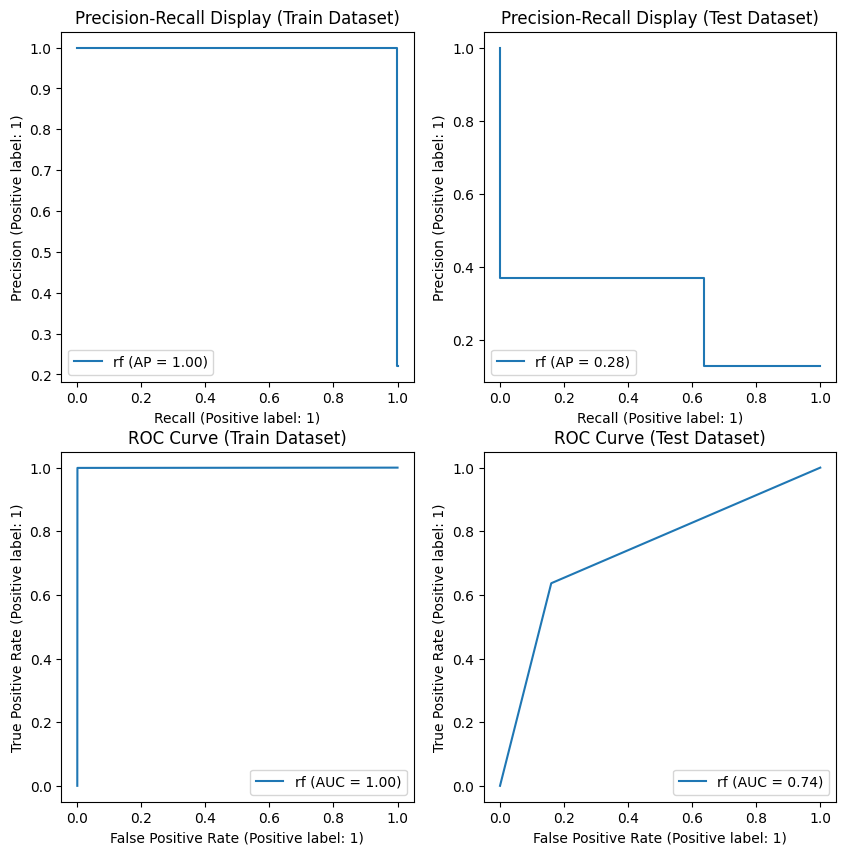

In [1]:
# Visualizing evaluation Metric Score chart
viz_pr_roc(model= rf_pipeline, name= "rf")

#### 2. Cross- Validation & Hyperparameter Tuning

In [84]:
rf_params= {
    "model__n_estimators": Integer(10, 200, prior= "log-uniform"),
    "model__max_depth": Integer(10, 100, prior= "log-uniform"),
    "model__max_features": Categorical(["sqrt", "log2", None]),
    "model__bootstrap": Categorical([True, False]),
    "model__warm_start": Categorical([True, False]),
}
best_rf= find_best_estimator(rf_pipeline, param_grid= rf_params)
print(crossval_f1_scores(best_rf))

mean f1 score: 0.822±0.005


In [6]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf_cv= BayesSearchCV(
    rf_pipeline,
    search_spaces= {
        "model__n_estimators": Integer(10, 200),
        "model__max_depth": Integer(10, 100),
        "model__max_features": Categorical(["sqrt", "log2", None]),
        "model__bootstrap": Categorical([True, False]),
        "model__warm_start": Categorical([True, False]),
    },
    cv= StratifiedKFold(shuffle= True, random_state= 42),
    n_jobs= -1, 
    scoring= "f1_micro",
    error_score= "raise"
)

rf_cv.fit(X_train, y_train_processed)

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.10/site

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('feature engineering',
                                         ColumnTransformer(transformers=[('Processing '
                                                                          'Numerical '
                                                                          'Columns',
                                                                          Pipeline(steps=[('scaling',
                                                                                           PowerTransformer()),
                                                                                          ('outlier '
                                                                                           'treatment',
                                                                                           FunctionTransformer(func=<function outlier_treatment at 0x7b24643cfeb0>))]),
                                                                          [0, 4,
                                                                           11,
                                                                           12,
                                                                           13,
                                                                           14,
                                                                           15,...
              search_spaces={'model__bootstrap': Categorical(categories=(True, False), prior=None),
                             'model__max_depth': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'model__max_features': Categorical(categories=('sqrt', 'log2', None), prior=None),
                             'model__n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize'),
                             'model__warm_start': Categorical(categories=(True, False), prior=None)})

In [22]:
# Fit the Algorithm
best_rf= clone(rf_cv.best_estimator_)
print(crossval_f1_scores(model= best_rf))

mean f1 score: 0.821


In [11]:
best_rf.fit(X_train, y_train_processed)

Pipeline(steps=[('feature engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7b24643cfeb0>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  Pipeline(steps=[('One Hot '
                                                                   'Encodi...
                                                                   'Encoding '
                                                                   'columns '
                                                                   "'pay_'",
                                                                   OrdinalEncoder(categories=[[-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                   

In [12]:
ma_b_rf= model_analysis(model= best_rf, name= "best rf")
ma_b_rf

{'model name': 'best rf',
 'f1 score(train dataset)': 0.866,
 'f1 score(test dataset)': 0.816}

In [15]:
best_rf_w_rfe= pipeline_w_rfe(best_rf)
# best_rf_w_rfe
print(crossval_f1_scores(best_rf_w_rfe))

mean f1 score: 0.821


In [16]:
best_rf_w_rfe.fit(X_train, y_train_processed)

Pipeline(steps=[('feature engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7b24643cfeb0>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  Pipeline(steps=[('One Hot '
                                                                   'Encodi...
                                                  slice(5, 11, None))])),
                ('feature_selection',
                 ColumnTransformer(transformers=[('RFE based feature selection',
                                                  'passthrough',
                                                  array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True]))])),
                ('model',
                 RandomForestClassifier(bootstrap=False, max_depth=10,
                                        max_features='log2', n_estimators=200,
                                        warm_start=True))])

In [17]:
ma_best_rf_w_rfe= model_analysis(model= best_rf_w_rfe, name= "best rf w/ rfe")
ma_best_rf_w_rfe

{'model name': 'best rf w/ rfe',
 'f1 score(train dataset)': 0.866,
 'f1 score(test dataset)': 0.816}

In [18]:
best_rf_w_pca= pipeline_w_pca(best_rf)
print(crossval_f1_scores(best_rf_w_pca))

mean f1 score: 0.807


In [19]:
best_rf_w_pca.fit(X_train, y_train_processed)

Pipeline(steps=[('feature engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7b24643cfeb0>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  Pipeline(steps=[('One Hot '
                                                                   'Encodi...
                                                                   OrdinalEncoder(categories=[[-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                         

In [21]:
ma_b_rf_w_pca= model_analysis(best_rf_w_pca, name= "best rf w/ pca")
ma_b_rf_w_pca

{'model name': 'best rf w/ pca',
 'f1 score(train dataset)': 0.845,
 'f1 score(test dataset)': 0.803}

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 4

> #### Linear Discriminant Analysis

In [3]:
lda_pipeline= Pipeline([
    (
        "feature_engineering",
        feature_engineering
    ),
    (
        "model",
        LinearDiscriminantAnalysis()
    )
])

print(crossval_f1_scores(lda_pipeline))

mean f1 score: 0.81


In [4]:
lda_pipeline.fit(X_train, y_train_processed)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7f8a87a73eb0>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  Pipeline(steps=[('One Hot '
                                                                   'Encod...
                                                                   OneHotEncoder(drop='first'))]),
                                                  [3]),
                                                 ("Ordinal Encoding 'pay_' "
                                                  'columns',
                                                  Pipeline(steps=[('Ordinal '
                                                                   'Encoding '
                                                                   'columns '
                                                                   "'pay_'",
                                                                   OrdinalEncoder(categories=[[-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                          

In [19]:
model_analysis(model= lda_pipeline, name= "lda")

{'model name': 'lda',
 'f1 score(train dataset)': 0.81,
 'f1 score(test dataset)': 0.815,
 'auc (train dataset)': 0.619,
 'auc (test dataset)': 0.614}

In [60]:
lda_params= {
    "model__solver": Categorical(["lsqr", "eigen"]),
    "model__shrinkage": Categorical([None, "auto"])
}
best_lda= find_best_estimator(lda_pipeline, param_grid= lda_params)

print(crossval_f1_scores(best_lda))

mean f1 score: 0.81±0.0018


In [66]:
model_analysis(model= best_lda, name= "best lda")

{'model name': 'best lda',
 'f1 score(train dataset)': 0.81,
 'f1 score(test dataset)': 0.807,
 'auc (train dataset)': 0.619,
 'auc (test dataset)': 0.614}

In [77]:
best_lda_w_rfe= pipeline_w_rfe(best_lda)
print(crossval_f1_scores(best_lda_w_rfe))

mean f1 score: 0.82±0.0034


In [78]:
#fitting the model
best_lda_w_rfe.fit(X_train, y_train_processed)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7d75cbcffeb0>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  Pipeline(steps=[('One Hot '
                                                                   'Encod...
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8]]))]),
                                                  slice(5, 11, None))])),
                ('feature_selection',
                 ColumnTransformer(transformers=[('RFE based feature selection',
                                                  'passthrough',
                                                  array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False]))])),
                ('model', LinearDiscriminantAnalysis(solver='lsqr'))])

In [83]:
ma_b_lda_w_rfe= model_analysis(best_lda_w_rfe, name= "best lda w/ rfe")
ma_b_lda_w_rfe

{'model name': 'best lda w/ rfe',
 'f1 score(train dataset)': 0.82,
 'f1 score(test dataset)': 0.818,
 'auc (train dataset)': 0.645,
 'auc (test dataset)': 0.641}

In [80]:
best_lda_w_pca= pipeline_w_pca(best_lda)
print(crossval_f1_scores(best_lda_w_pca))

mean f1 score: 0.804±0.0029


In [81]:
best_lda_w_pca.fit(X_train, y_train_processed)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7d75cbcffeb0>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  Pipeline(steps=[('One Hot '
                                                                   'Encod...
                                                  Pipeline(steps=[('Ordinal '
                                                                   'Encoding '
                                                                   'columns '
                                                                   "'pay_'",
                                                                   OrdinalEncoder(categories=[[-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                                                                               -1,
                                                                                               0,
                                                                                               1,
                                        

In [82]:
ma_b_lda_w_pca= model_analysis(best_lda_w_pca, name= "best lda w/ pca")
ma_b_lda_w_pca

{'model name': 'best lda w/ pca',
 'f1 score(train dataset)': 0.804,
 'f1 score(test dataset)': 0.801,
 'auc (train dataset)': 0.602,
 'auc (test dataset)': 0.597}

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
pd.DataFrame([
    ma_svc, ma_b_svc, ma_b_svc_w_rfe, ma_b_svc_w_pca,
    ma_ada, ma_b_ada, ma_b_ada_w_rfe, ma_b_ada_w_pca,
    ma_rf, ma_b_rf, ma_b_rf_w_rfe, ma_b_rf_w_pca,
    ma_lda, ma_b_lda, ma_b_lda_w_rfe, ma_b_lda_w_pca
]).sort_values("f1 score(test dataset)", ascending= False)

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***